<a href="https://www.kaggle.com/code/anthonynam/smoke-status-prediction?scriptVersionId=155209404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> 1. Import Library  </h1>

</div>

In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = None

import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, ReLU, LeakyReLU,SimpleRNN
from tensorflow.keras.optimizers import SGD,Adagrad,Adam
from tensorflow.keras.metrics import BinaryAccuracy,AUC
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.over_sampling import SMOTE,ADASYN
from collections import Counter

---
<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> 2. Data Preparation </h1>

</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<h2> 2.1 Data Loading </h2>
</div>

In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s3e24/train.csv",index_col = 0)

In [3]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [5]:
df.shape

(159256, 23)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<h2> 2.2 Data Cleaning </h2>
</div>

In [6]:
df.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

All columns are numerical columns.

In [7]:
df.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

There is no null value.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin           1

---
<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> 3. Exploratory Data Analysis (Single Variable)</h1>

</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.1 Column - <b><i>Smoking</i></b> </h2>
</div>

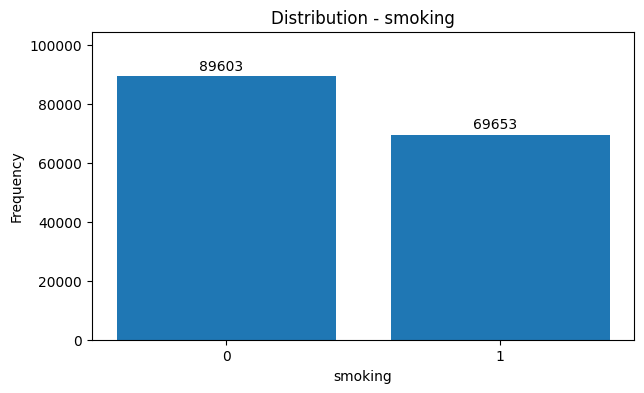

In [9]:
col="smoking"
data = df[col].value_counts()
plt.figure(figsize=(7,4))
plt.bar(data.index, 
        data.values
        )
for k,v in zip(data.index,data.values):
    plt.text(k-0.1,v+2000,v)
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.ylim([0,max(data.values)+15000])
plt.xticks([0,1])
plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.2 Column - <b><i>Age</i></b> </h2>
</div>

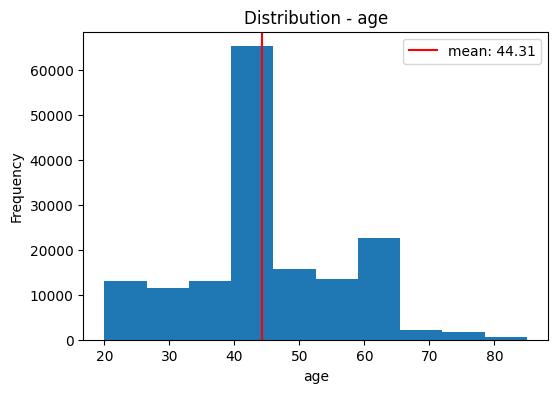

In [10]:
col = "age"
plt.figure(figsize=(6,4))
plt.hist(df[col],bins=10)
plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.legend()
plt.show()

More records are with age between 40 - 50.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.3 Column - <b><i>Height, Weight & Waist</i></b> </h2>
</div>

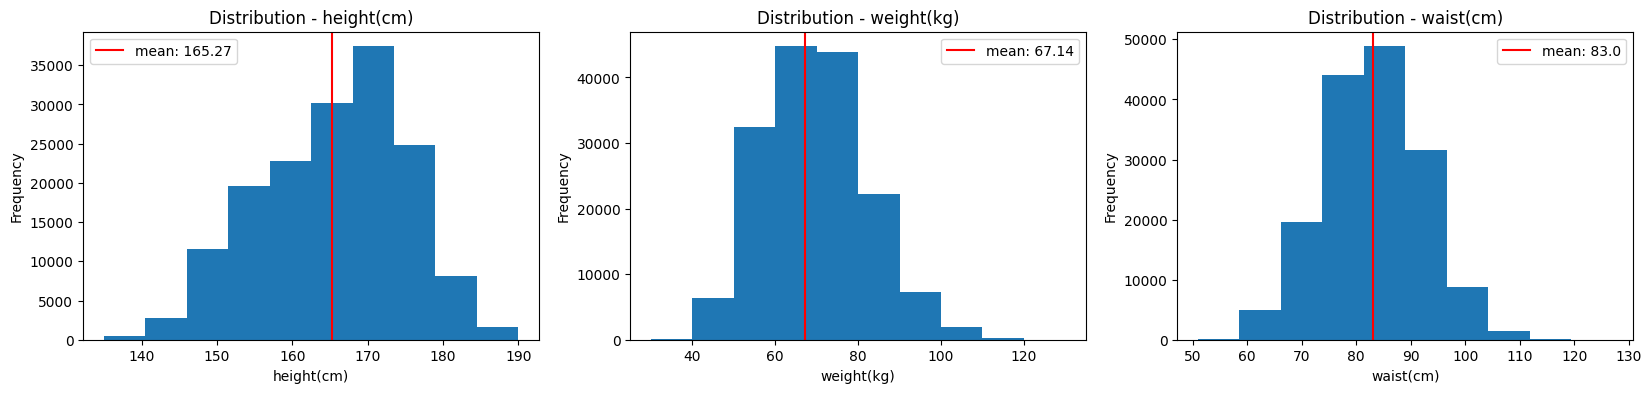

In [11]:
cols = ["height(cm)","weight(kg)","waist(cm)"]
plt.subplots(1,3,figsize=(20,4))

for i,col in enumerate(cols):
    plt.subplot(1,3,i+1)
    plt.hist(df[col],bins=10)
    plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution - {col}")
    plt.legend()
plt.show()

For height, weight and waist, they tend to follow normal distribution.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.4 Column - <b><i>Eyesight</i></b> </h2>
</div>

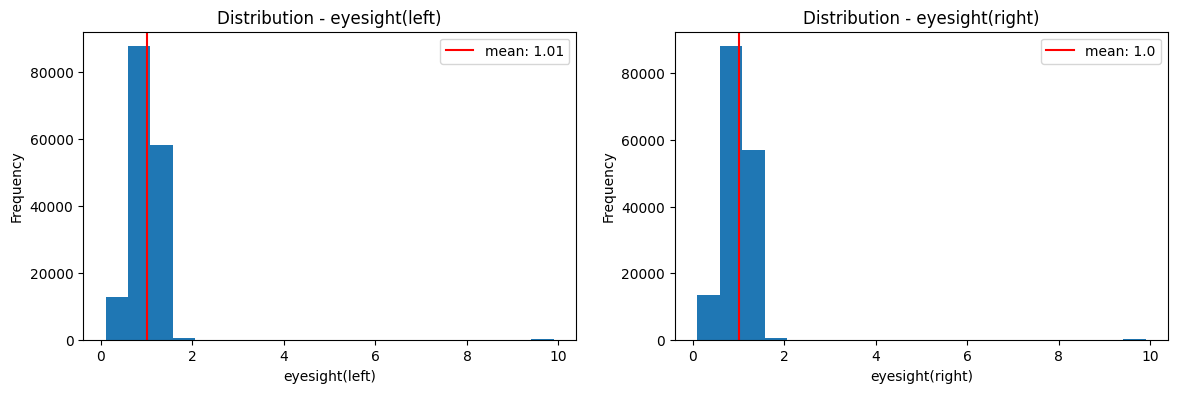

In [12]:
cols = ["eyesight(left)","eyesight(right)"]
plt.subplots(1,2,figsize=(14,4))

for i,col in enumerate(cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col],bins=20)
    plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution - {col}")
    plt.legend()
plt.show()

It seems there is some outliers on the right of both charts.

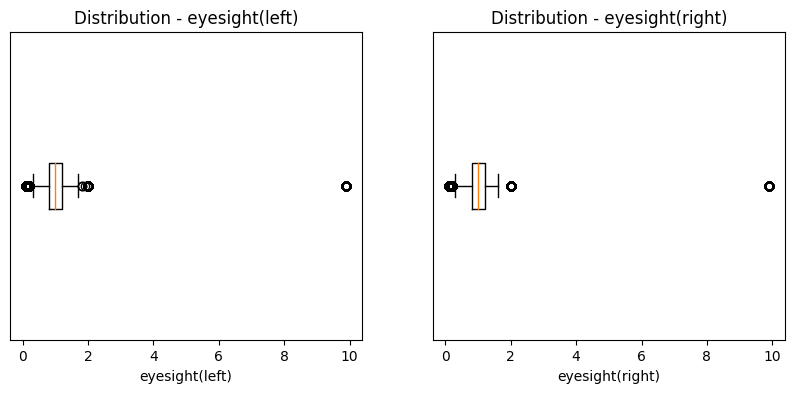

In [13]:
cols = ["eyesight(left)","eyesight(right)"]
plt.subplots(1,2,figsize=(10,4))

for i,col in enumerate(cols):
    plt.subplot(1,2,i+1)
    plt.boxplot(df[col],vert=False)
    plt.xlabel(col)
    plt.title(f"Distribution - {col}")
    plt.yticks([])
plt.show()


Let's remove the outlier and plot the distribution again.

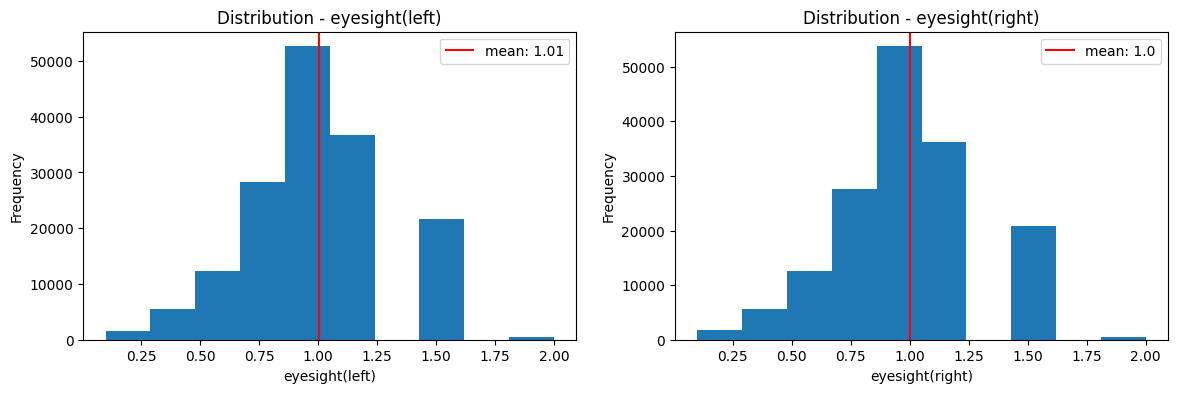

In [14]:
cols = ["eyesight(left)","eyesight(right)"]
plt.subplots(1,2,figsize=(14,4))

for i,col in enumerate(cols):
    plt.subplot(1,2,i+1)
    plt.hist(df.loc[df[col]<=3,col],bins=10)
    plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution - {col}")
    plt.legend()
plt.show()



According to the above visualization, we can see that both of these columns are highly correlated.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.5 Column - <b><i>Hearing</i></b> </h2>
</div>

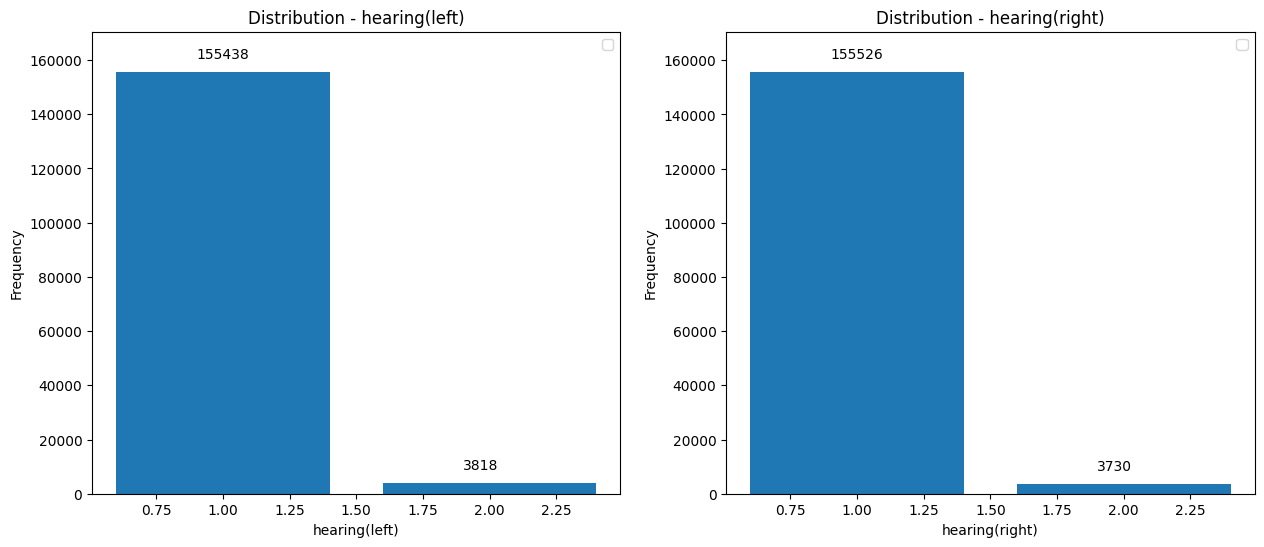

In [15]:
cols = ["hearing(left)","hearing(right)"]
plt.subplots(1,2,figsize=(15,6))

for i,col in enumerate(cols):
    data = df[col].value_counts()
    ax = plt.subplot(1,2,i+1)
    plt.bar(data.index, 
            data.values
            )
    for k,v in zip(data.index,data.values):
        ax.text(k-0.1,v+5000,v)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution - {col}")
    plt.legend()
    plt.ylim([0,max(data.values)+15000])
plt.show()

- For `hearing`, the distributions are quite imbalanced.
- Similar to `eyesight`, both `hearing(left)` and `hearing(right)` share a very similar pattern. There may be underlying relationship.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.6 Column - <b><i>Systolic & Relaxation</i></b> </h2>
</div>

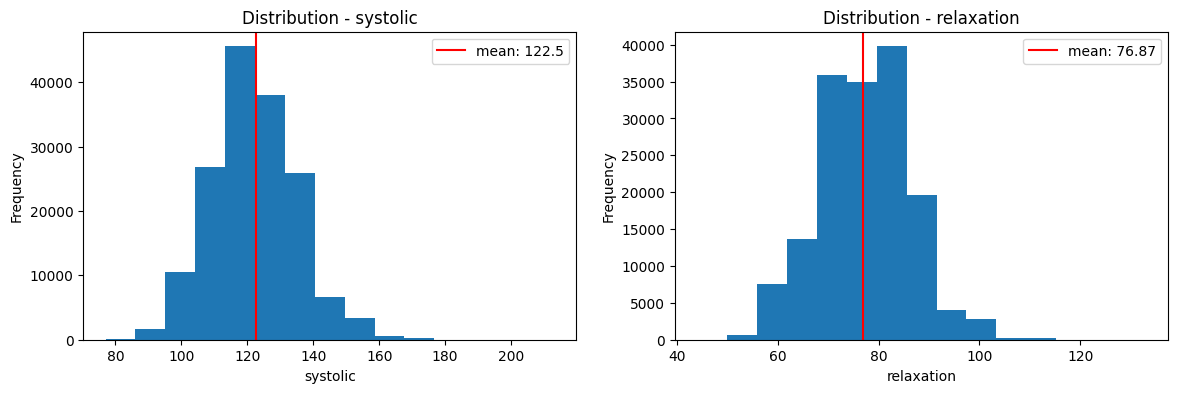

In [16]:
cols = ["systolic","relaxation"]
plt.subplots(1,2,figsize=(14,4))

for i,col in enumerate(cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col],bins=15)
    plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution - {col}")
    plt.legend()
plt.show()


These columns which are related to blood pressure follow normal distribution too.
Maybe there are some relationship between these columns.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.7 Column - <b><i>Fasting Blood Pressure, Cholesterol & triglyceride</i></b> </h2>
</div>

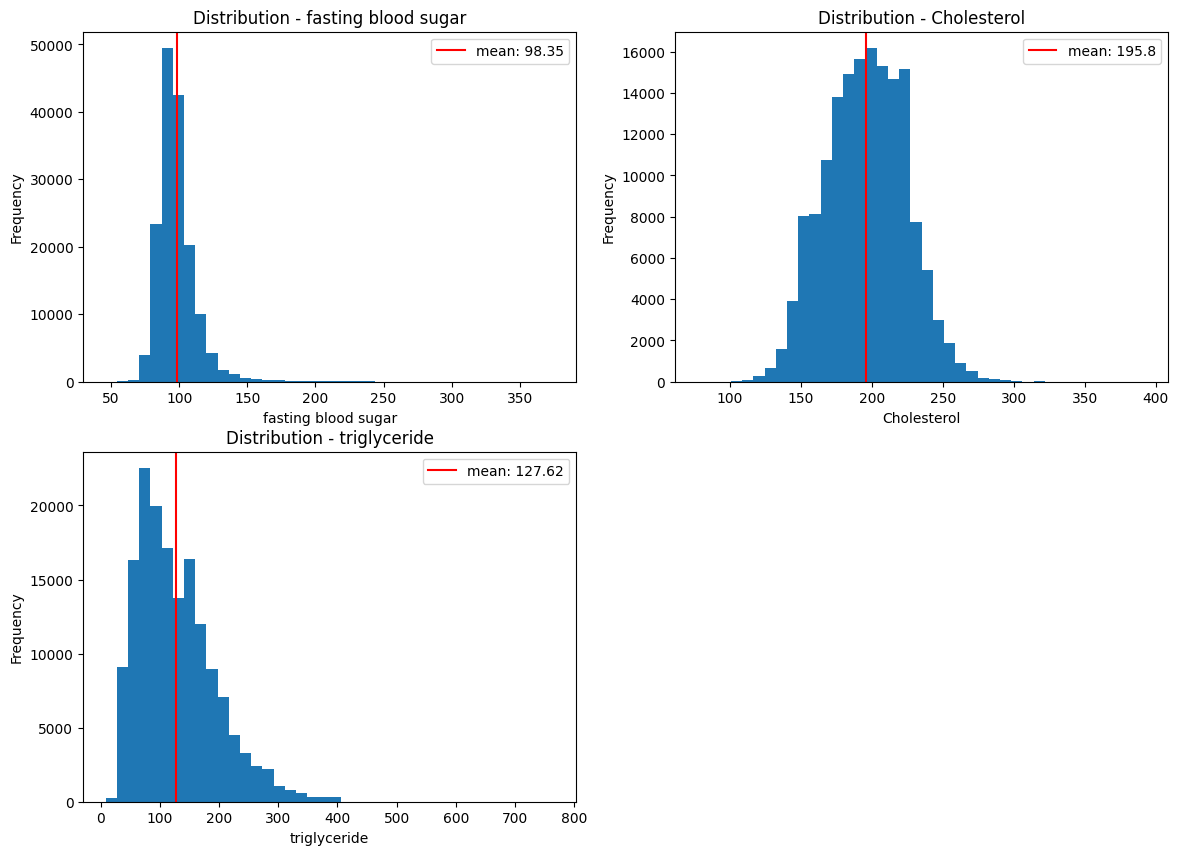

In [17]:
cols = ["fasting blood sugar","Cholesterol","triglyceride"]
fig,axes = plt.subplots(2,2,figsize=(14,10))

for i,col in enumerate(cols):
    plt.subplot(2,2,i+1)
    plt.hist(df[col],bins=40)
    plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution - {col}")
    plt.legend()
fig.delaxes(axes[1][1])
plt.show()

These columns have some outliers on the right, but generally `fasting blood sugar` & `Cholesterol` follow normal distribution and `triglyceride` follow log-normal distributiton

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.8 Column - <b><i>HDL & LDL</i></b> </h2>
</div>

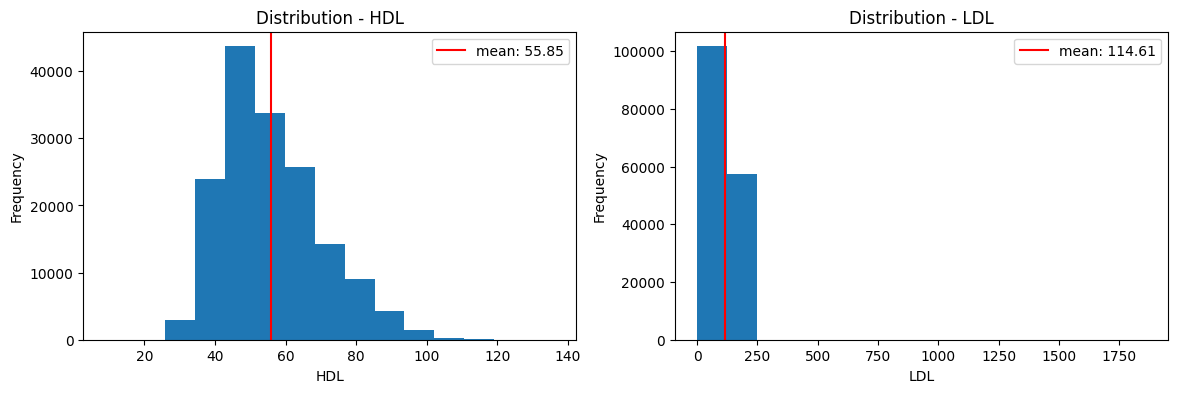

In [18]:
cols = ["HDL","LDL"]
plt.subplots(1,2,figsize=(14,4))

for i,col in enumerate(cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col],bins=15)
    plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution - {col}")
    plt.legend()
plt.show()


For `LDL`, there may be some outliers on the right.

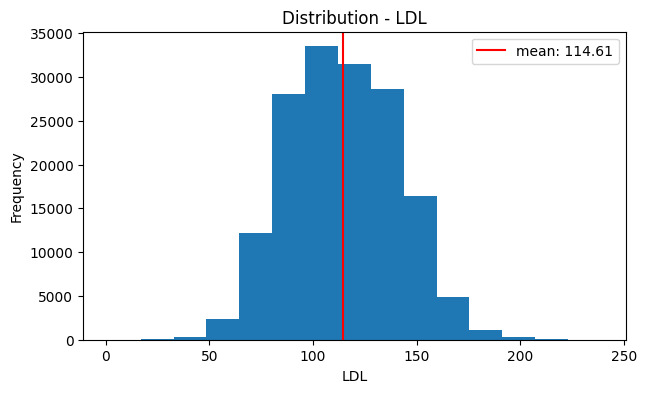

In [19]:
col="LDL"
plt.figure(figsize=(7,4))
plt.hist(df.loc[df[col]<=250,col],bins=15)
plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.legend()
plt.show()

Both `HDL` and `LDL` follow normal distribution.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.9 Column - <b><i>Hemoglobin, Urine protein & Serum Creatinine</i></b> </h2>
</div>

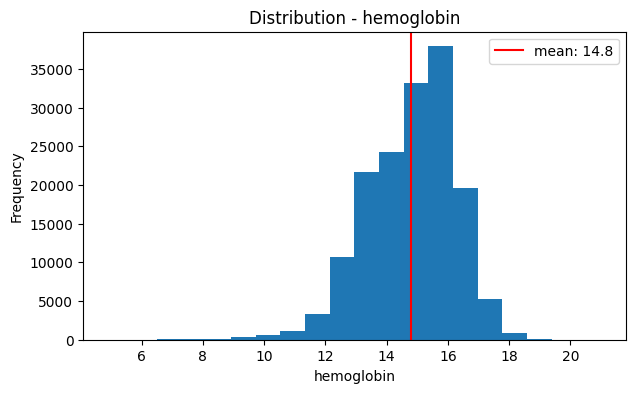

In [20]:
col="hemoglobin"
plt.figure(figsize=(7,4))
plt.hist(df[col],bins=20)
plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.legend()
plt.show()

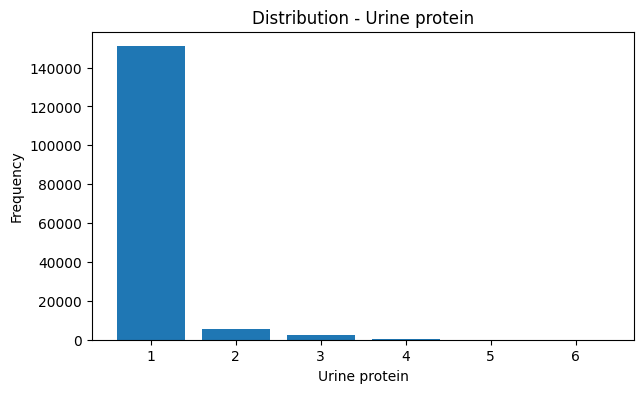

In [21]:
col="Urine protein"
plt.figure(figsize=(7,4))
data = df[col].value_counts()
plt.bar(data.index,data.values)
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.show()

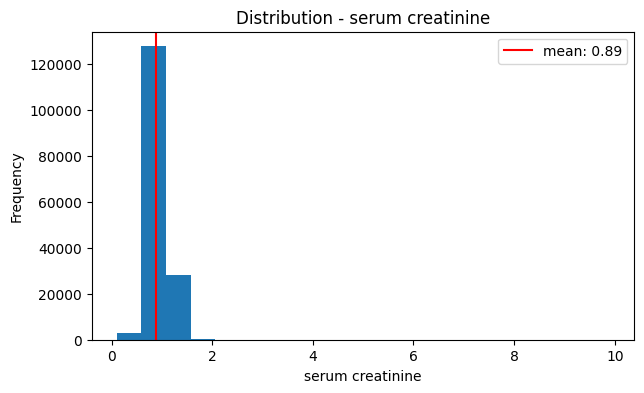

In [22]:
col="serum creatinine"
plt.figure(figsize=(7,4))
plt.hist(df[col],bins=20)
plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.legend()
plt.show()

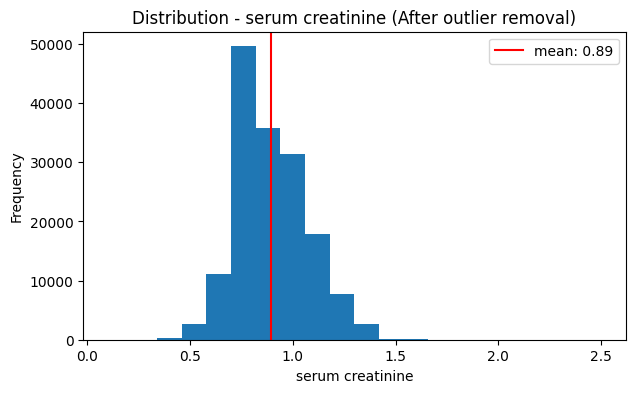

In [23]:
col="serum creatinine"
plt.figure(figsize=(7,4))
plt.hist(df.loc[df[col]<3,col],bins=20)
plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col} (After outlier removal)")
plt.legend()
plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.10 Column - <b><i>AST & ALT</i></b> </h2>
</div>

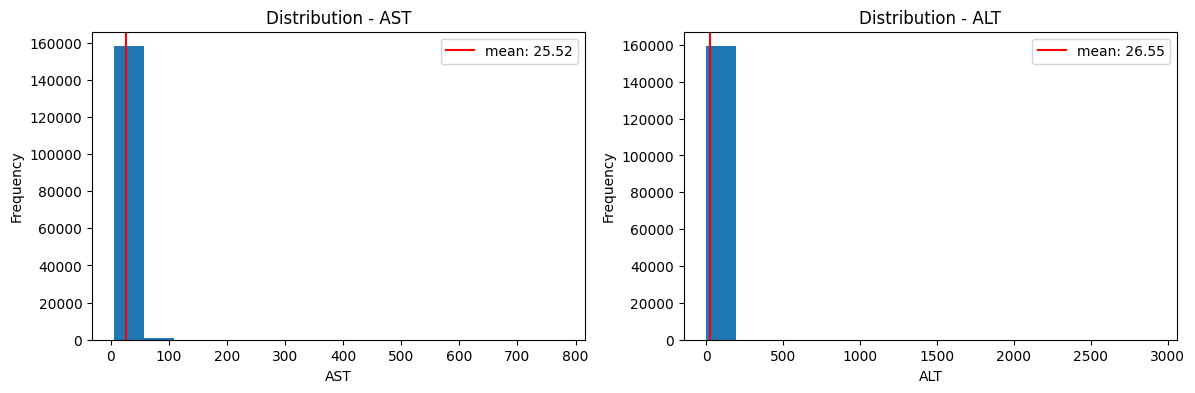

In [24]:
cols = ["AST","ALT"]
plt.subplots(1,2,figsize=(14,4))

for i,col in enumerate(cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col],bins=15)
    plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution - {col}")
    plt.legend()
plt.show()


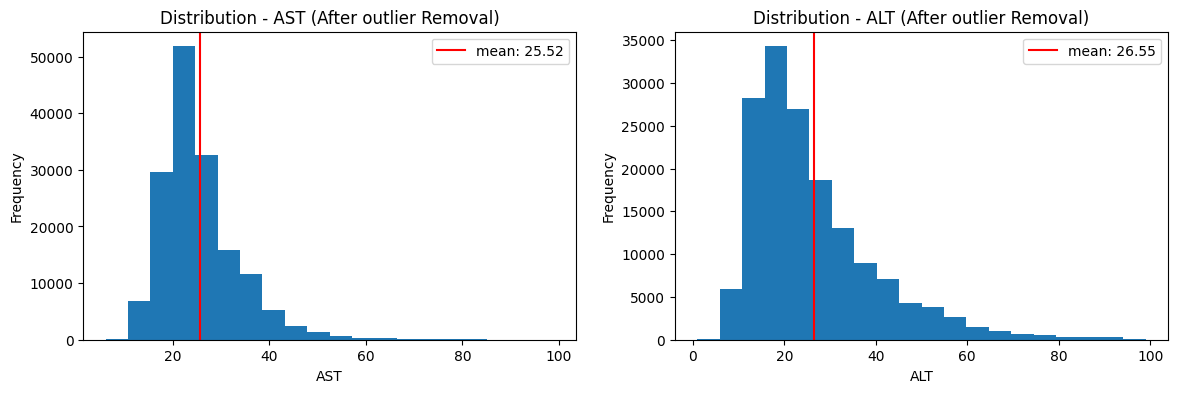

In [25]:
cols = ["AST","ALT"]
plt.subplots(1,2,figsize=(14,4))

for i,col in enumerate(cols):
    plt.subplot(1,2,i+1)
    plt.hist(df.loc[df[col]<100,col],bins=20)
    plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution - {col} (After outlier Removal)")
    plt.legend()
plt.show()


It seems that they are following log-normal distribution.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.11 Column - <b><i>Gtp</i></b> </h2>
</div>

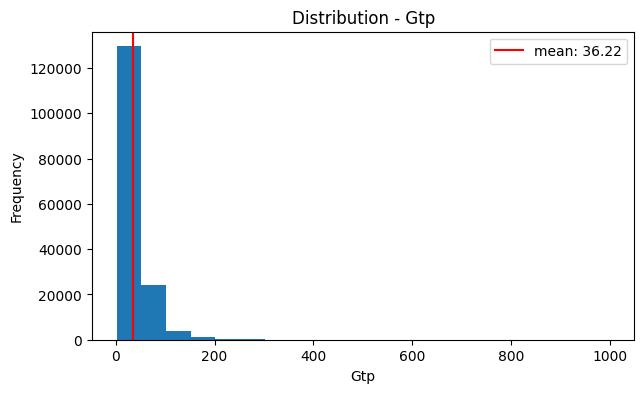

In [26]:
col="Gtp"
plt.figure(figsize=(7,4))
plt.hist(df[col],bins=20)
plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.legend()
plt.show()

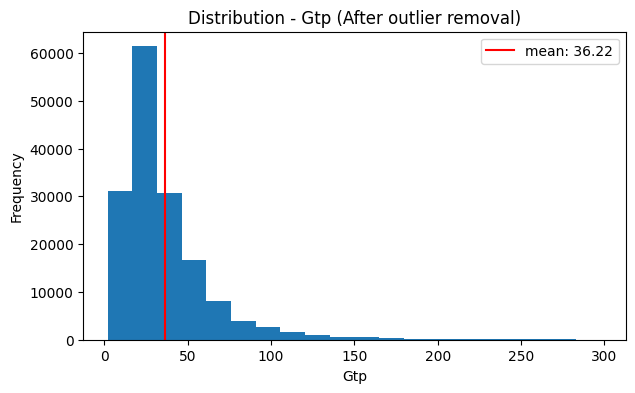

In [27]:
col="Gtp"
plt.figure(figsize=(7,4))
plt.hist(df.loc[df[col]<300,col],bins=20)
plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col} (After outlier removal)")
plt.legend()
plt.show()

It seems that this column is following log-normal distribution.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 3.12 Column - <b><i>Dental Caries</i></b> </h2>
</div>

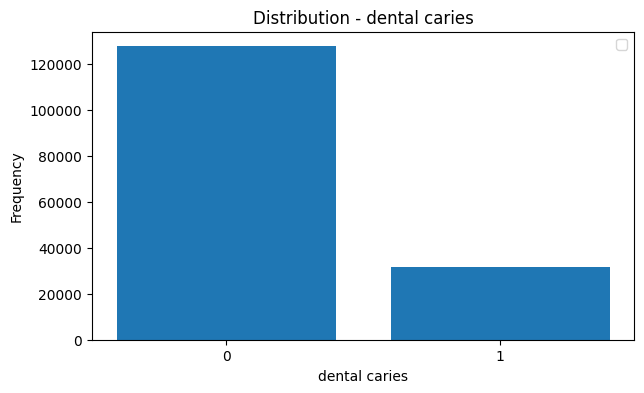

In [28]:
col="dental caries"
plt.figure(figsize=(7,4))
data = df[col].value_counts()
plt.bar(data.index,data.values)
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.legend()
plt.xticks([0,1])
plt.show()

---
<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> 4. Exploratory Data Analysis (Bi-variate)</h1>

</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.1 Relationship - <b><i>age</i></b> vs <b><i>smoking</i></b></h2>
</div>

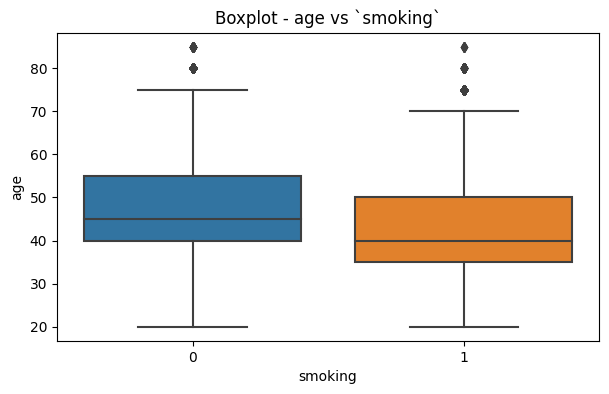

In [29]:
col="age"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.show()

Although we can see a obvious difference of the median age in different groups, `age` may not be a huge factor to decided whether a person is smoking or not.   
Instead, smoking may damage your health that may shorten a person's life which may result in the above phenomenon.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.2 Relationship - <b><i>height</i></b> vs <b><i>smoking</i></b></h2>
</div>

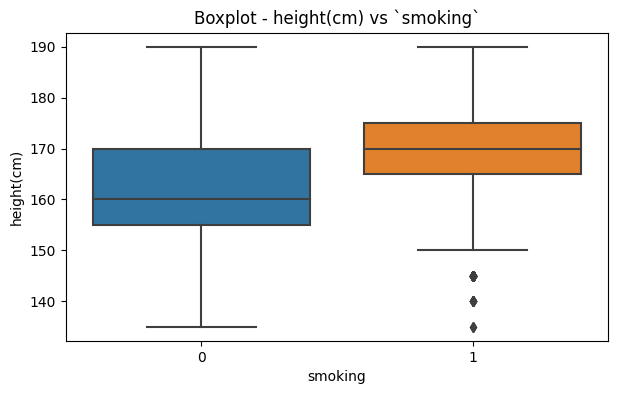

In [30]:
col="height(cm)"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.show()

Although we can see a obvious difference of the median height in different groups, `height` may not be a huge factor to decided whether a person is smoking or not.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.3 Relationship - <b><i>weight/waist</i></b> vs <b><i>smoking</i></b></h2>
</div>

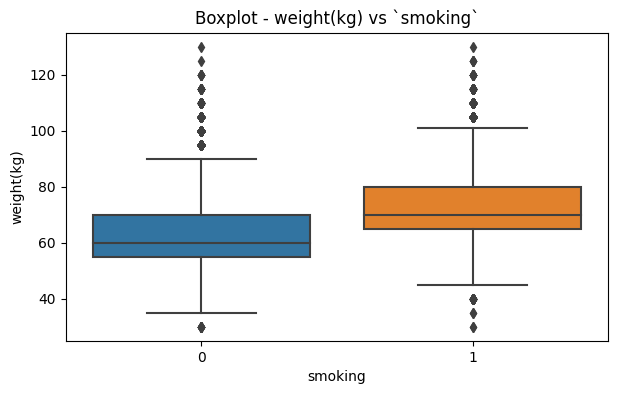

In [31]:
col="weight(kg)"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.show()

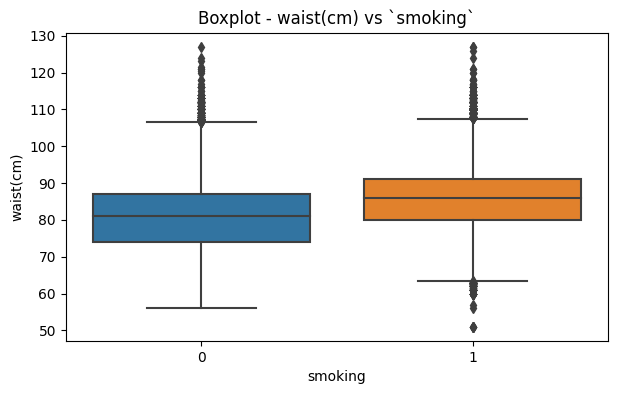

In [32]:
col="waist(cm)"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.show()

Given some research conducted by professional, heavy smoking may possibly lead to obesity (`weight` & `waist`).

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.4 Relationship - <b><i>eyesight</i></b> vs <b><i>smoking</i></b></h2>
</div>

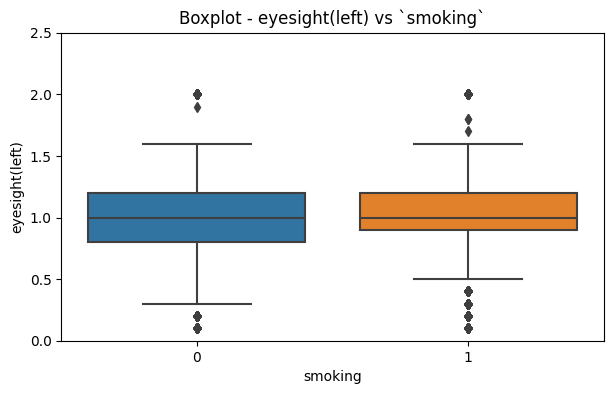

In [33]:
col="eyesight(left)"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.ylim([0,2.5])
plt.show()

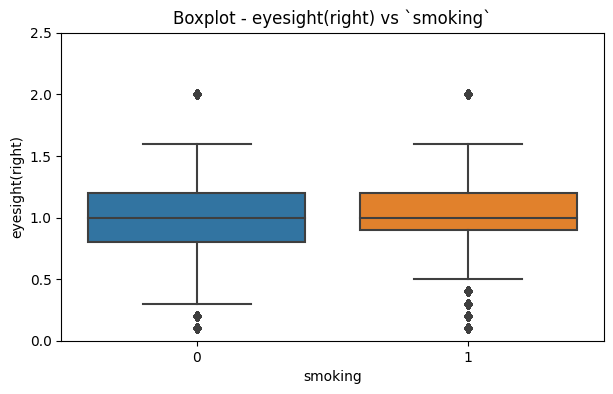

In [34]:
col="eyesight(right)"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.ylim([0,2.5])
plt.show()

From these two plots above, we can see that smoking has likely no relationship with `eyesight` issue.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.5 Relationship - <b><i>blood pressure</i></b> vs <b><i>smoking</i></b></h2>
</div>

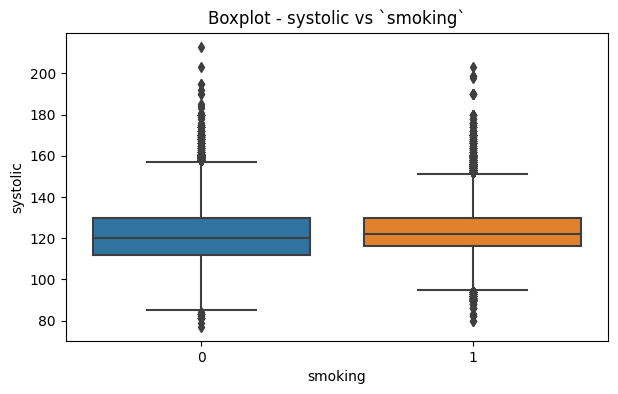

In [35]:
col="systolic"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.show()

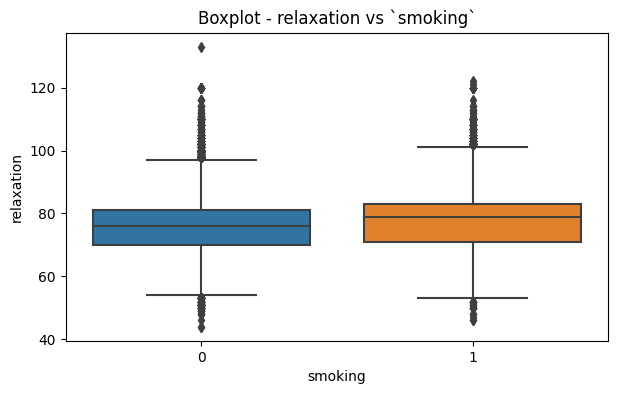

In [36]:
col="relaxation"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.show()

From these two plots above, we can see that 
- smoking has likely no relationship with `systolic` blood pressure
- BUT, smoker tends to have higher `relaxation` blood pressure

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.6 Relationship - <b><i>fasting blood sugar</i></b> vs <b><i>smoking</i></b></h2>
</div>

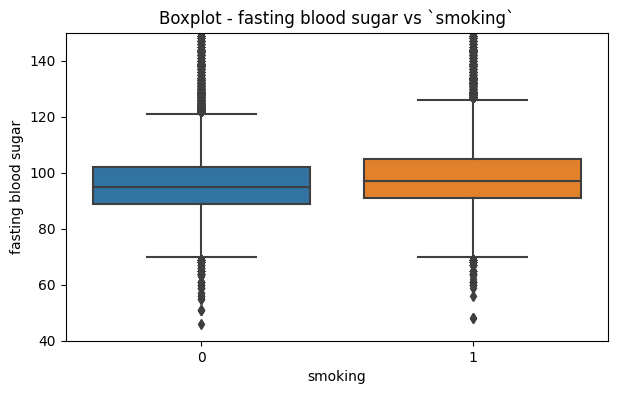

In [37]:
col="fasting blood sugar"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.ylim([40,150])
plt.show()

From the plot above, we can see that smoking has likely no relationship with `fasting blood sugar`.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.7 Relationship - <b><i>cholesterol</i></b> vs <b><i>smoking</i></b></h2>
</div>

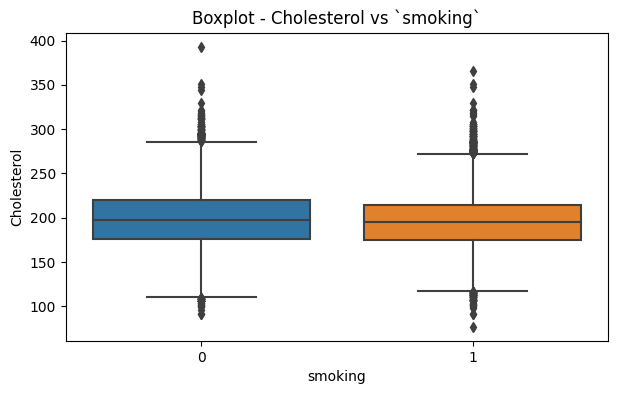

In [38]:
col="Cholesterol"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.show()

From the plot above, we can see that smoking has likely no relationship with `cholesterol`.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.8 Relationship - <b><i>triglyceride</i></b> vs <b><i>smoking</i></b></h2>
</div>

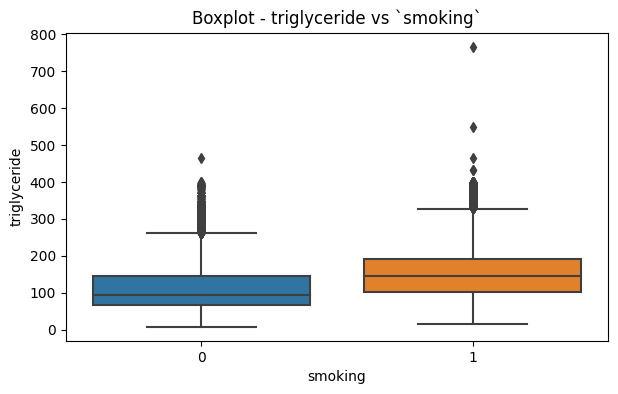

In [39]:
col="triglyceride"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.show()

From the plot above, we can see that smokers are more likely to have high `triglyceride`.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.9 Relationship - <b><i>HDL/LDL</i></b> vs <b><i>smoking</i></b></h2>
</div>

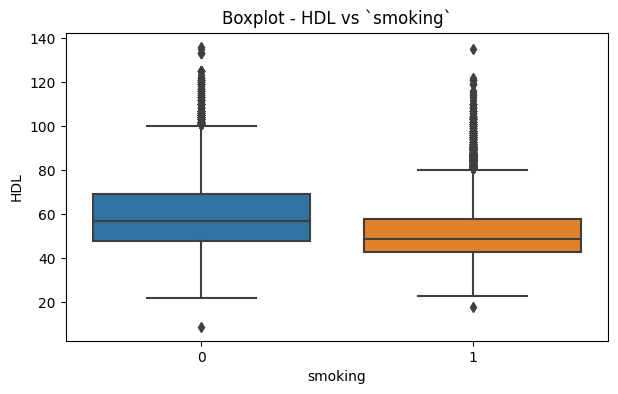

In [40]:
col="HDL"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.show()

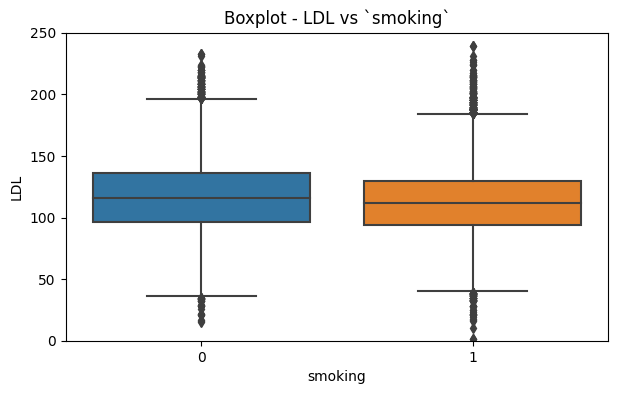

In [41]:
col="LDL"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.ylim([0,250])
plt.show()

From these plots above, we can see that smokers are more likely to have lower `HDL`.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.10 Relationship - <b><i>hemoglobin</i></b> vs <b><i>smoking</i></b></h2>
</div>

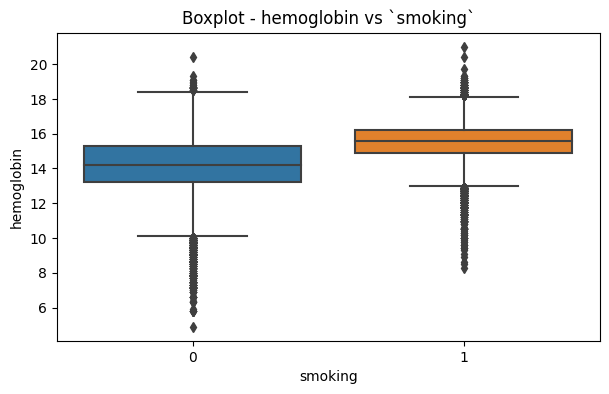

In [42]:
col="hemoglobin"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.show()

From the plot above, we can see that smokers are more likely to have high `hemoglobin`.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.11 Relationship - <b><i>serum creatinine</i></b> vs <b><i>smoking</i></b></h2>
</div>

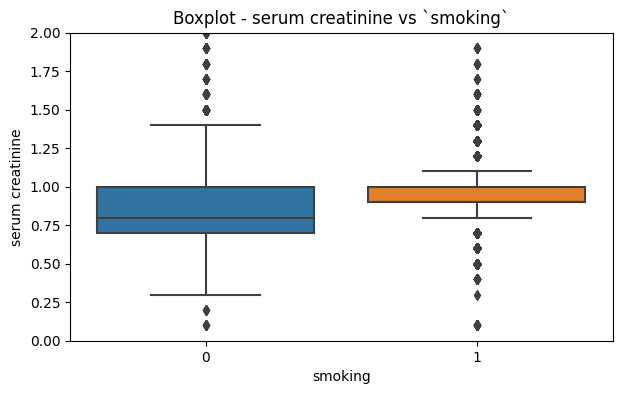

In [43]:
col="serum creatinine"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.ylim([0,2])
plt.show()

From the plot above, we can see that smokers are more likely to have high `serum creatinine`.

## Relationship - `AST` vs `smoking`

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.12 Relationship - <b><i>AST</i></b> vs <b><i>smoking</i></b></h2>
</div>

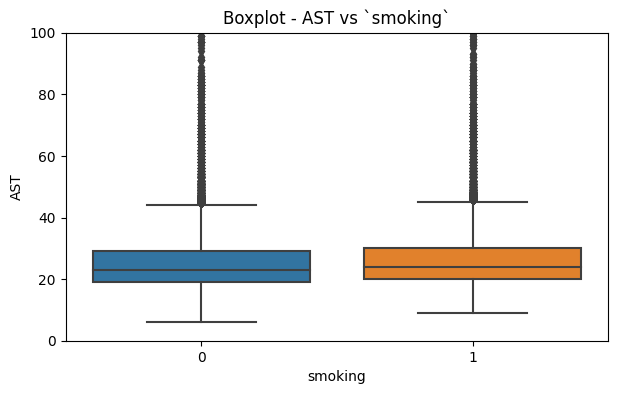

In [44]:
col="AST"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.ylim([0,100])
plt.show()

From the plot above, we can see that smoking has likely no relationship with `AST`.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.13 Relationship - <b><i>ALT</i></b> vs <b><i>smoking</i></b></h2>
</div>

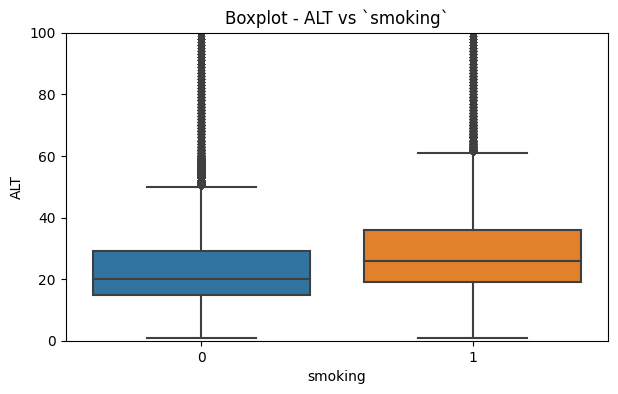

In [45]:
col="ALT"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.ylim([0,100])
plt.show()

From the plot above, we can see that smokers are more likely to have high `ALT`.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 4.14 Relationship - <b><i>Gtp</i></b> vs <b><i>smoking</i></b></h2>
</div>

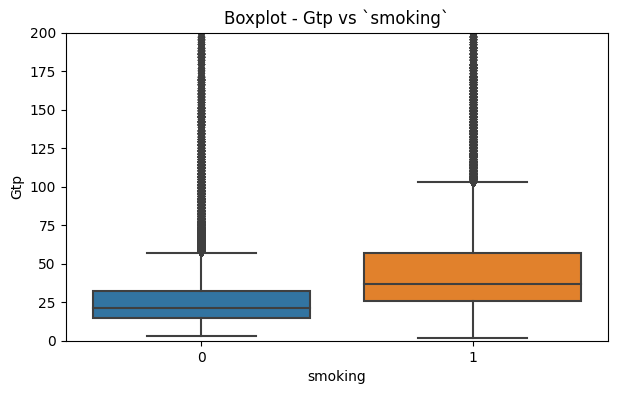

In [46]:
col="Gtp"
plt.figure(figsize=(7,4))
sns.boxplot(data=df,x="smoking",y=col)
plt.ylabel(col)
plt.xlabel("smoking")
plt.title(f"Boxplot - {col} vs `smoking`")
plt.ylim([0,200])
plt.show()

From the plot above, we can see that smokers are more likely to have high `Gtp`.

---
<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> 5. Correlation Analysis</h1>

</div>

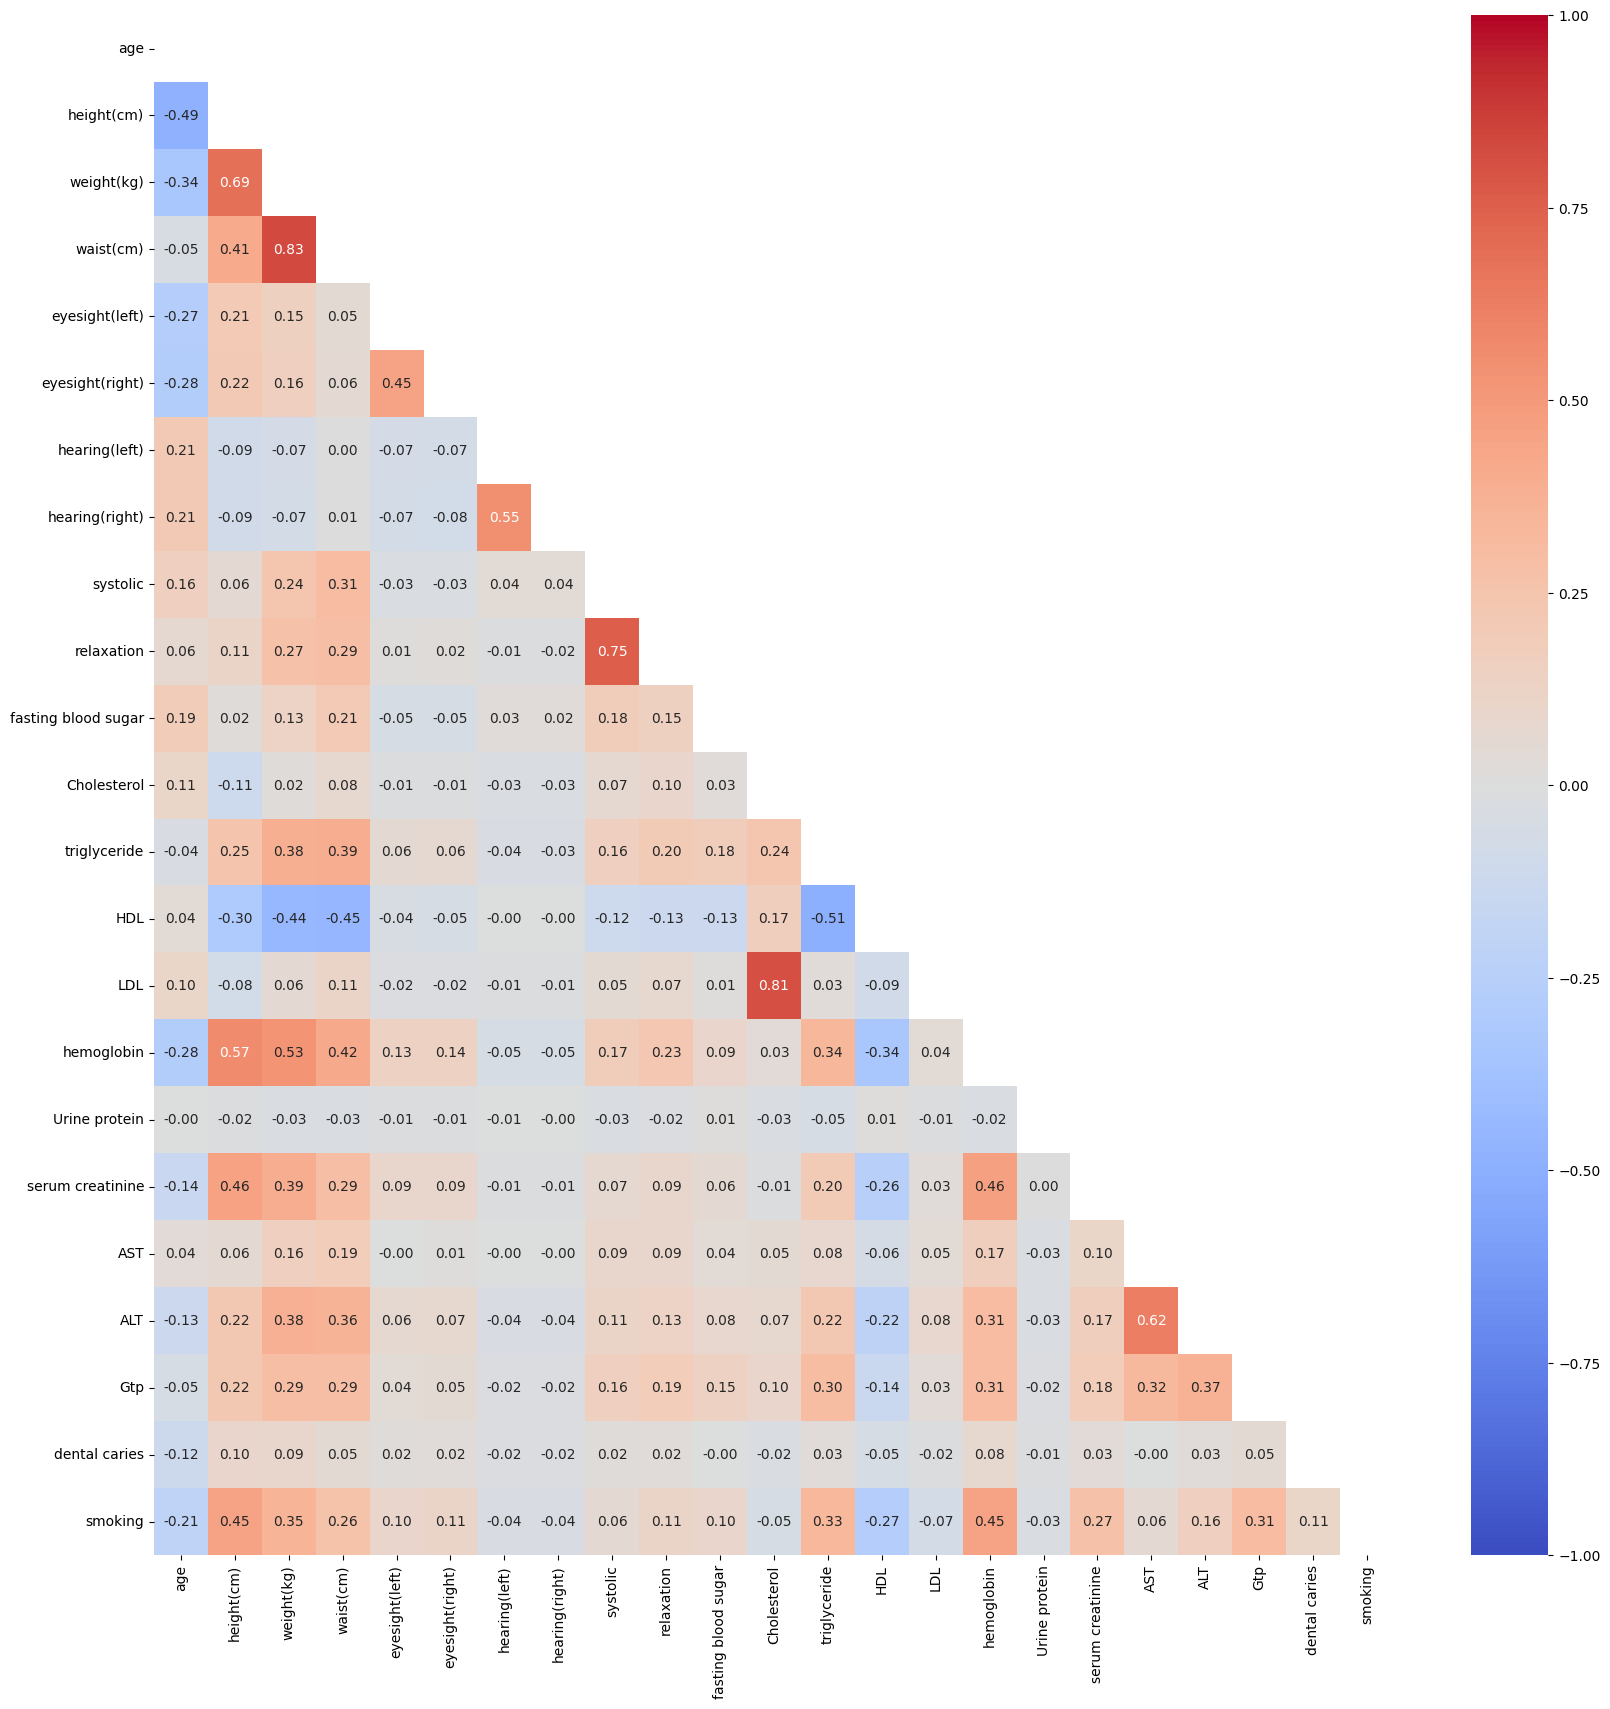

In [47]:
corr_df = df.corr()
mask = np.triu(corr_df)
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,
            annot = True, 
            fmt= ".2f",
            mask = mask,
            vmin = -1, vmax = 1,
            cmap = "coolwarm")
plt.show()

From the above correlation table, we can see that some of the columns are highly correlated. We may need to handle them later.

**Conclusion of EDA:**
- Among all these analysis, there are no any unreasonable / inappropriate data (such as zero weight / zero height).
- We spot out some columns that are with log-normal distribution.
- We spot out some features that are correlated to the target variable `smoking`.

---

---
<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> 6. Feature Engineering</h1>

</div>

In [48]:
processed_df = df.copy()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 6.1 Log-transformation - <b><i>Gtp</i></b></h2>
</div>

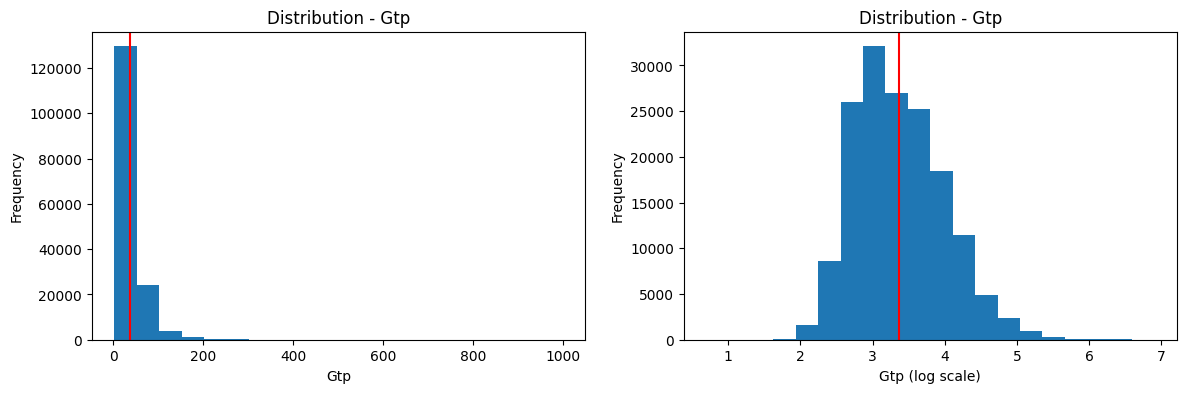

In [49]:
# Compare distribution before and after log
plt.subplots(1,2,figsize=(14,4))

col="Gtp"

plt.subplot(1,2,1)
plt.hist(df[col],bins=20)
plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")

plt.subplot(1,2,2)
plt.hist(df[col].apply(np.log),bins=20)
plt.axvline(df[col].apply(np.log).mean(),color = "red",label = f"mean: {round(df[col].apply(np.log).mean(),2)}")
plt.xlabel(f"{col} (log scale)")
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.show()

In [50]:
# Transform data now
processed_df["log_Gtp"] = processed_df["Gtp"].apply(np.log)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 6.2 Log-transformation - <b><i>AST</i></b></h2>
</div>

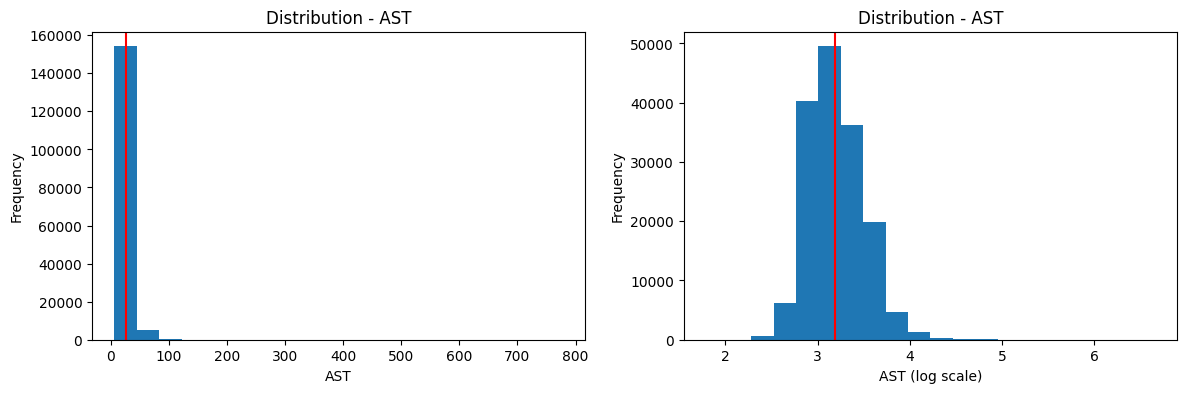

In [51]:
# Compare distribution before and after log
plt.subplots(1,2,figsize=(14,4))

col="AST"

plt.subplot(1,2,1)
plt.hist(df[col],bins=20)
plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")

plt.subplot(1,2,2)
plt.hist(df[col].apply(np.log),bins=20)
plt.axvline(df[col].apply(np.log).mean(),color = "red",label = f"mean: {round(df[col].apply(np.log).mean(),2)}")
plt.xlabel(f"{col} (log scale)")
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.show()

In [52]:
# Transform data now
processed_df["log_AST"] = processed_df["AST"].apply(np.log)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 6.3 Log-transformation - <b><i>ALT</i></b></h2>
</div>

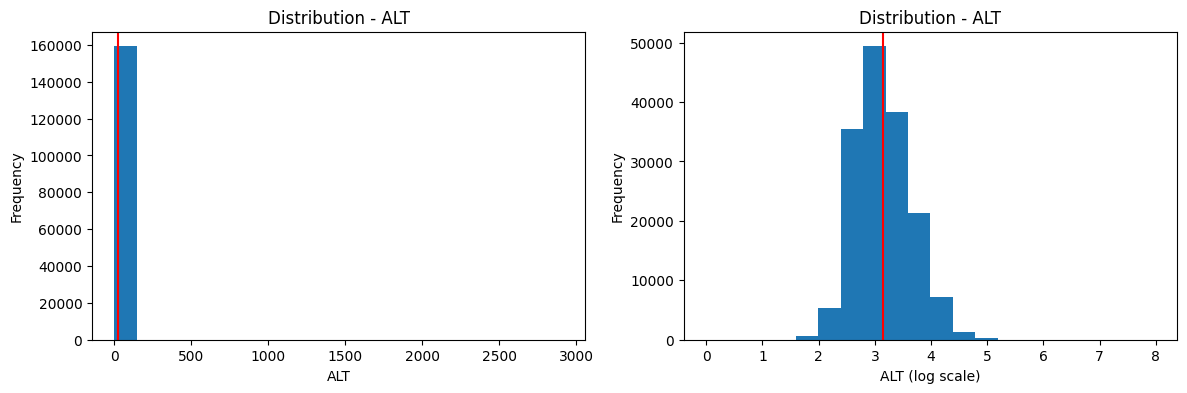

In [53]:
# Compare distribution before and after log
plt.subplots(1,2,figsize=(14,4))

col="ALT"

plt.subplot(1,2,1)
plt.hist(df[col],bins=20)
plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")

plt.subplot(1,2,2)
plt.hist(df[col].apply(np.log),bins=20)
plt.axvline(df[col].apply(np.log).mean(),color = "red",label = f"mean: {round(df[col].apply(np.log).mean(),2)}")
plt.xlabel(f"{col} (log scale)")
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.show()

In [54]:
# Transform data now
processed_df["log_ALT"] = processed_df["ALT"].apply(np.log)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 6.4 Log-transformation - <b><i>triglyceride</i></b></h2>
</div>

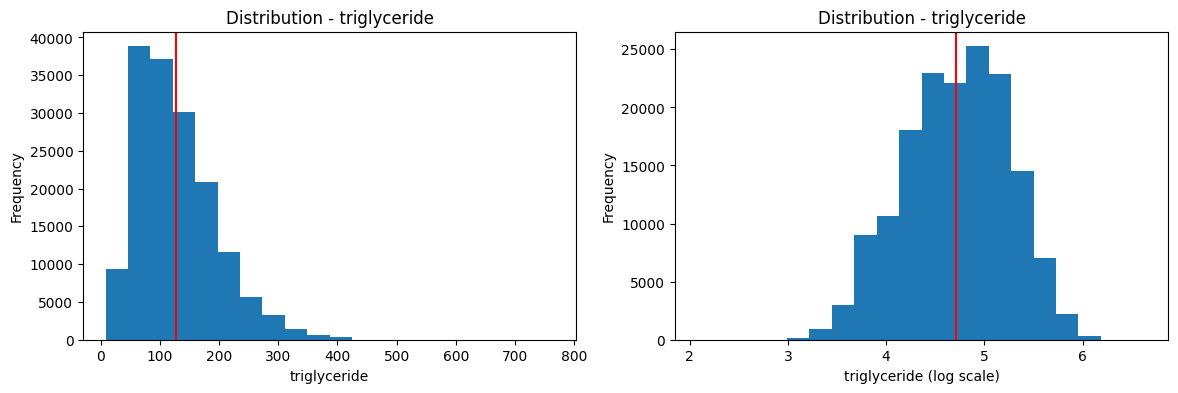

In [55]:
# Compare distribution before and after log
plt.subplots(1,2,figsize=(14,4))

col="triglyceride"

plt.subplot(1,2,1)
plt.hist(df[col],bins=20)
plt.axvline(df[col].mean(),color = "red",label = f"mean: {round(df[col].mean(),2)}")
plt.xlabel(col)
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")

plt.subplot(1,2,2)
plt.hist(df[col].apply(np.log),bins=20)
plt.axvline(df[col].apply(np.log).mean(),color = "red",label = f"mean: {round(df[col].apply(np.log).mean(),2)}")
plt.xlabel(f"{col} (log scale)")
plt.ylabel("Frequency")
plt.title(f"Distribution - {col}")
plt.show()

In [56]:
# Transform data now
processed_df["log_triglyceride"] = processed_df["triglyceride"].apply(np.log)

In [57]:
# Drop away columns with log-transformation
processed_df.drop(columns=["Gtp","AST","ALT","triglyceride"],
        inplace = True)

Let's check the correlation heatmap again after adding new features.

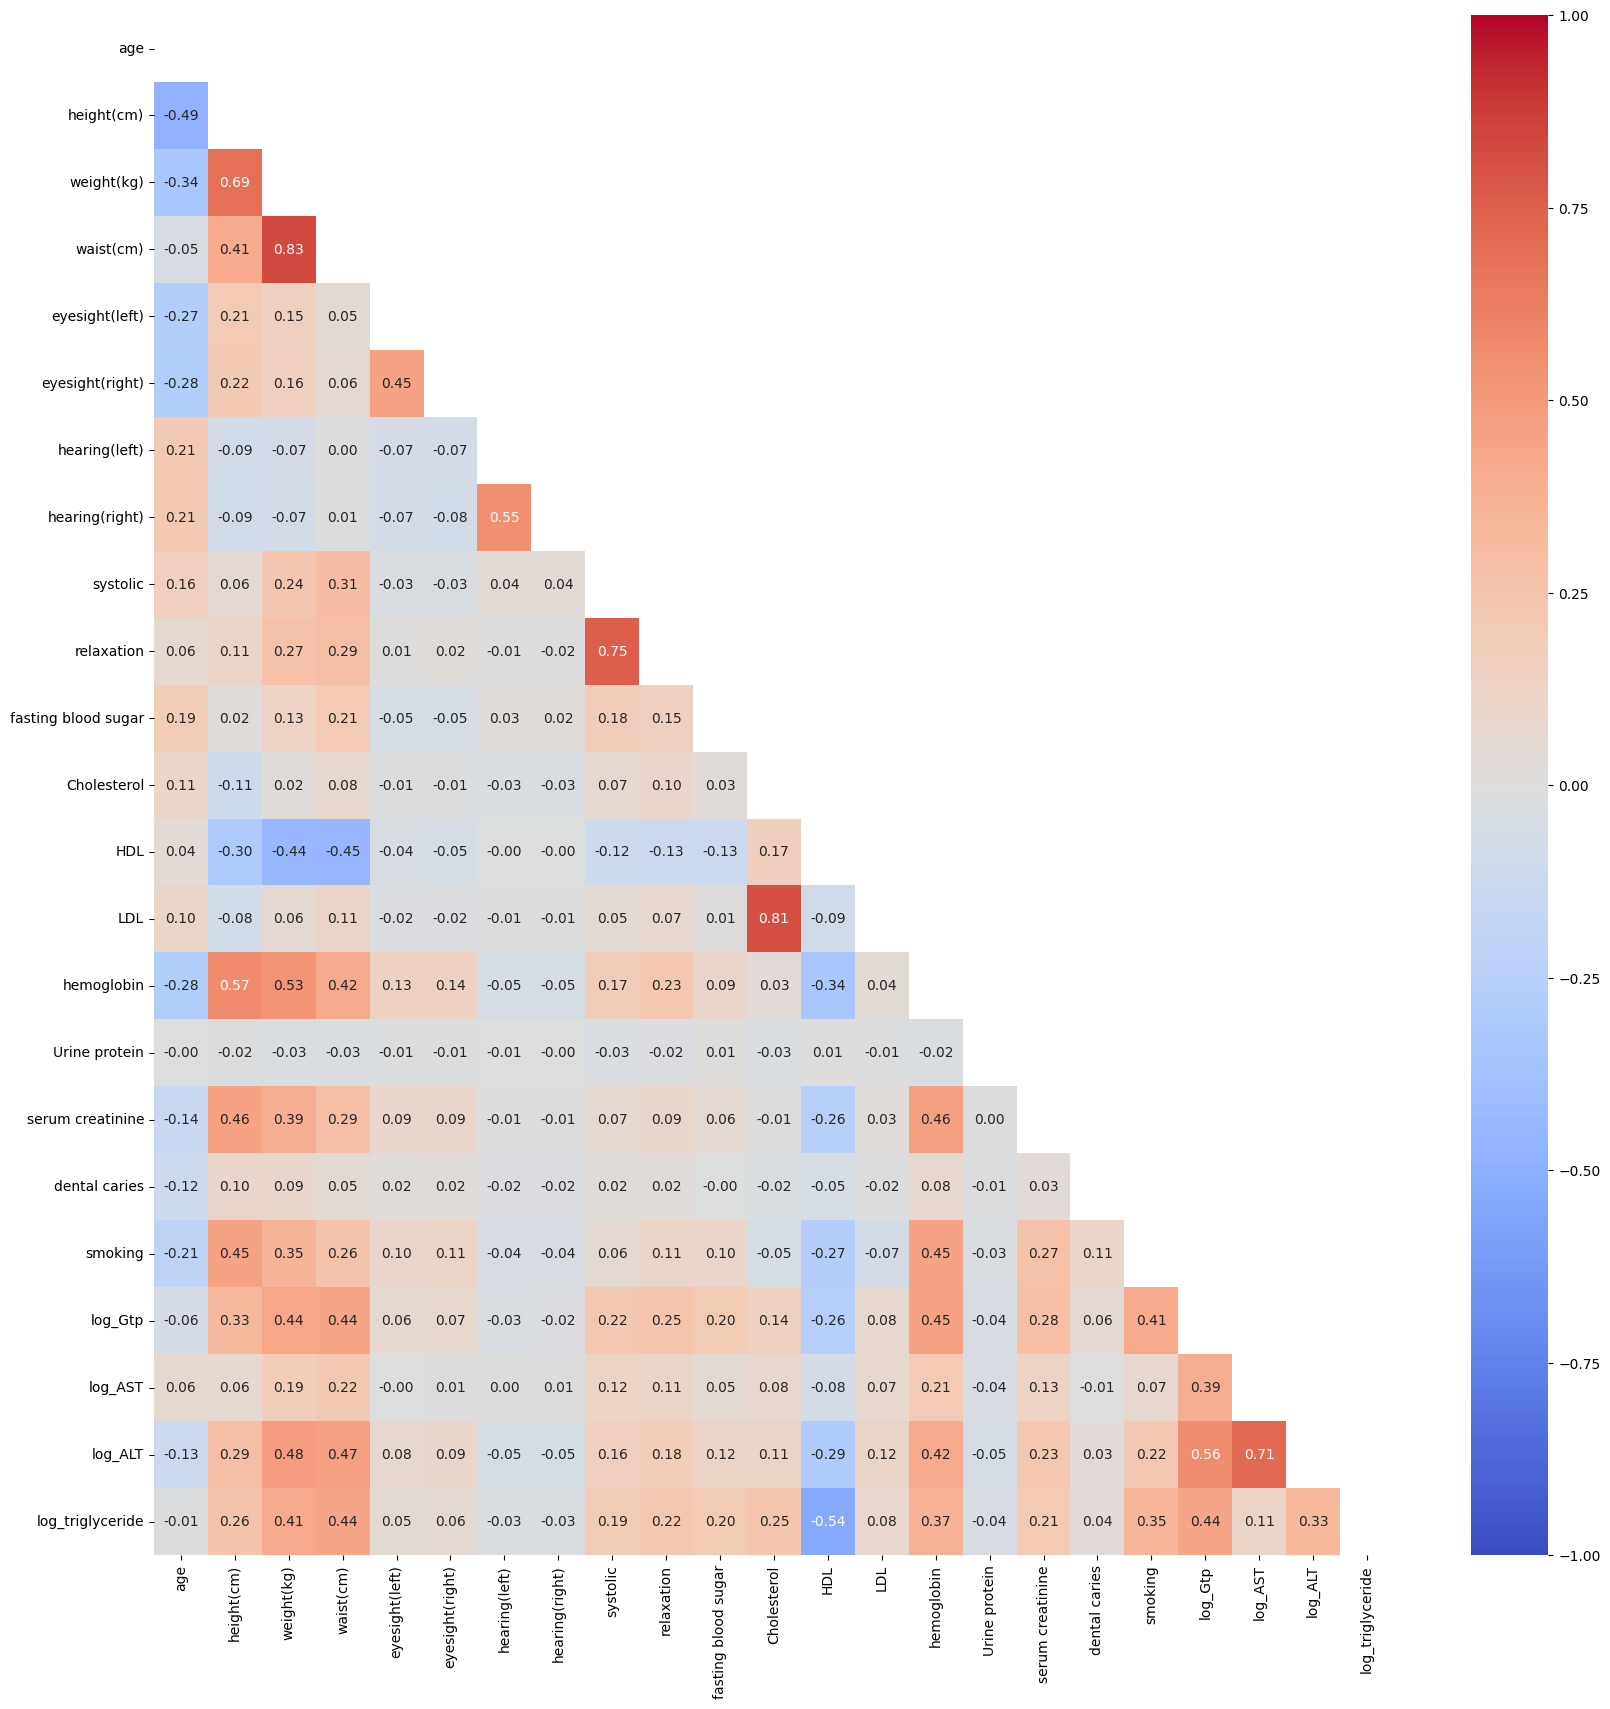

In [58]:
corr_df = processed_df.corr()
mask = np.triu(corr_df)
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,
            annot = True, 
            fmt= ".2f",
            mask = mask,
            vmin = -1, vmax = 1,
            cmap = "coolwarm")
plt.show()

From the correlation heatmap above, we can see that tthe following pairs are highly correlated:
- `waist(cm)` and `weight(kg)`
    - We will drop `waist(cm)` as it is less related to the prediction of smoking status
- `height(cm)` and `weight(kg)`
    - We will drop `height(cm)` as it is theoretically less related to the prediction of smoking status
- `waist(cm)` and `weight(kg)`
    - We will drop `waist(cm)` as it is less related to the prediction of smoking status
- `systolic` and `relaxation`
    - We will drop `systolic` as `relaxation` has stronger correlation with `smoking`
- `Cholesterol` and `LDL`
    - We will drop `Cholesterol` as `LDL` has stronger correlation with `smoking`
- `log_AST` and `log_ALT`
    - We will drop `log_AST` as `log_ALT` has stronger correlation with `smoking`

In [59]:
processed_df.drop(columns=["waist(cm)","systolic","Cholesterol","log_AST","height(cm)"],inplace = True)

In [60]:
processed_df.head()

,age,weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),relaxation,fasting blood sugar,HDL,LDL,hemoglobin,Urine protein,serum creatinine,dental caries,smoking,log_Gtp,log_ALT,log_triglyceride
id,,,,,,,,,,,,,,,,,,
0,55,60,0.5,0.6,1,1,87,94,40,75,16.5,1,1.0,0,1,3.295837,3.218876,5.703782
1,70,65,0.6,0.7,2,2,83,147,57,126,16.2,1,1.1,1,0,3.610918,3.135494,4.007333
2,20,75,0.4,0.5,1,1,75,79,45,93,17.4,1,0.8,0,1,3.970292,3.433987,5.283204
3,35,95,1.5,1.2,1,1,88,91,38,102,15.9,1,1.0,1,0,3.401197,3.295837,5.313206
4,30,60,1.5,1.0,1,1,76,91,44,93,15.4,1,0.8,0,1,2.833213,2.564949,4.465908


Let's double check correlation between each features.

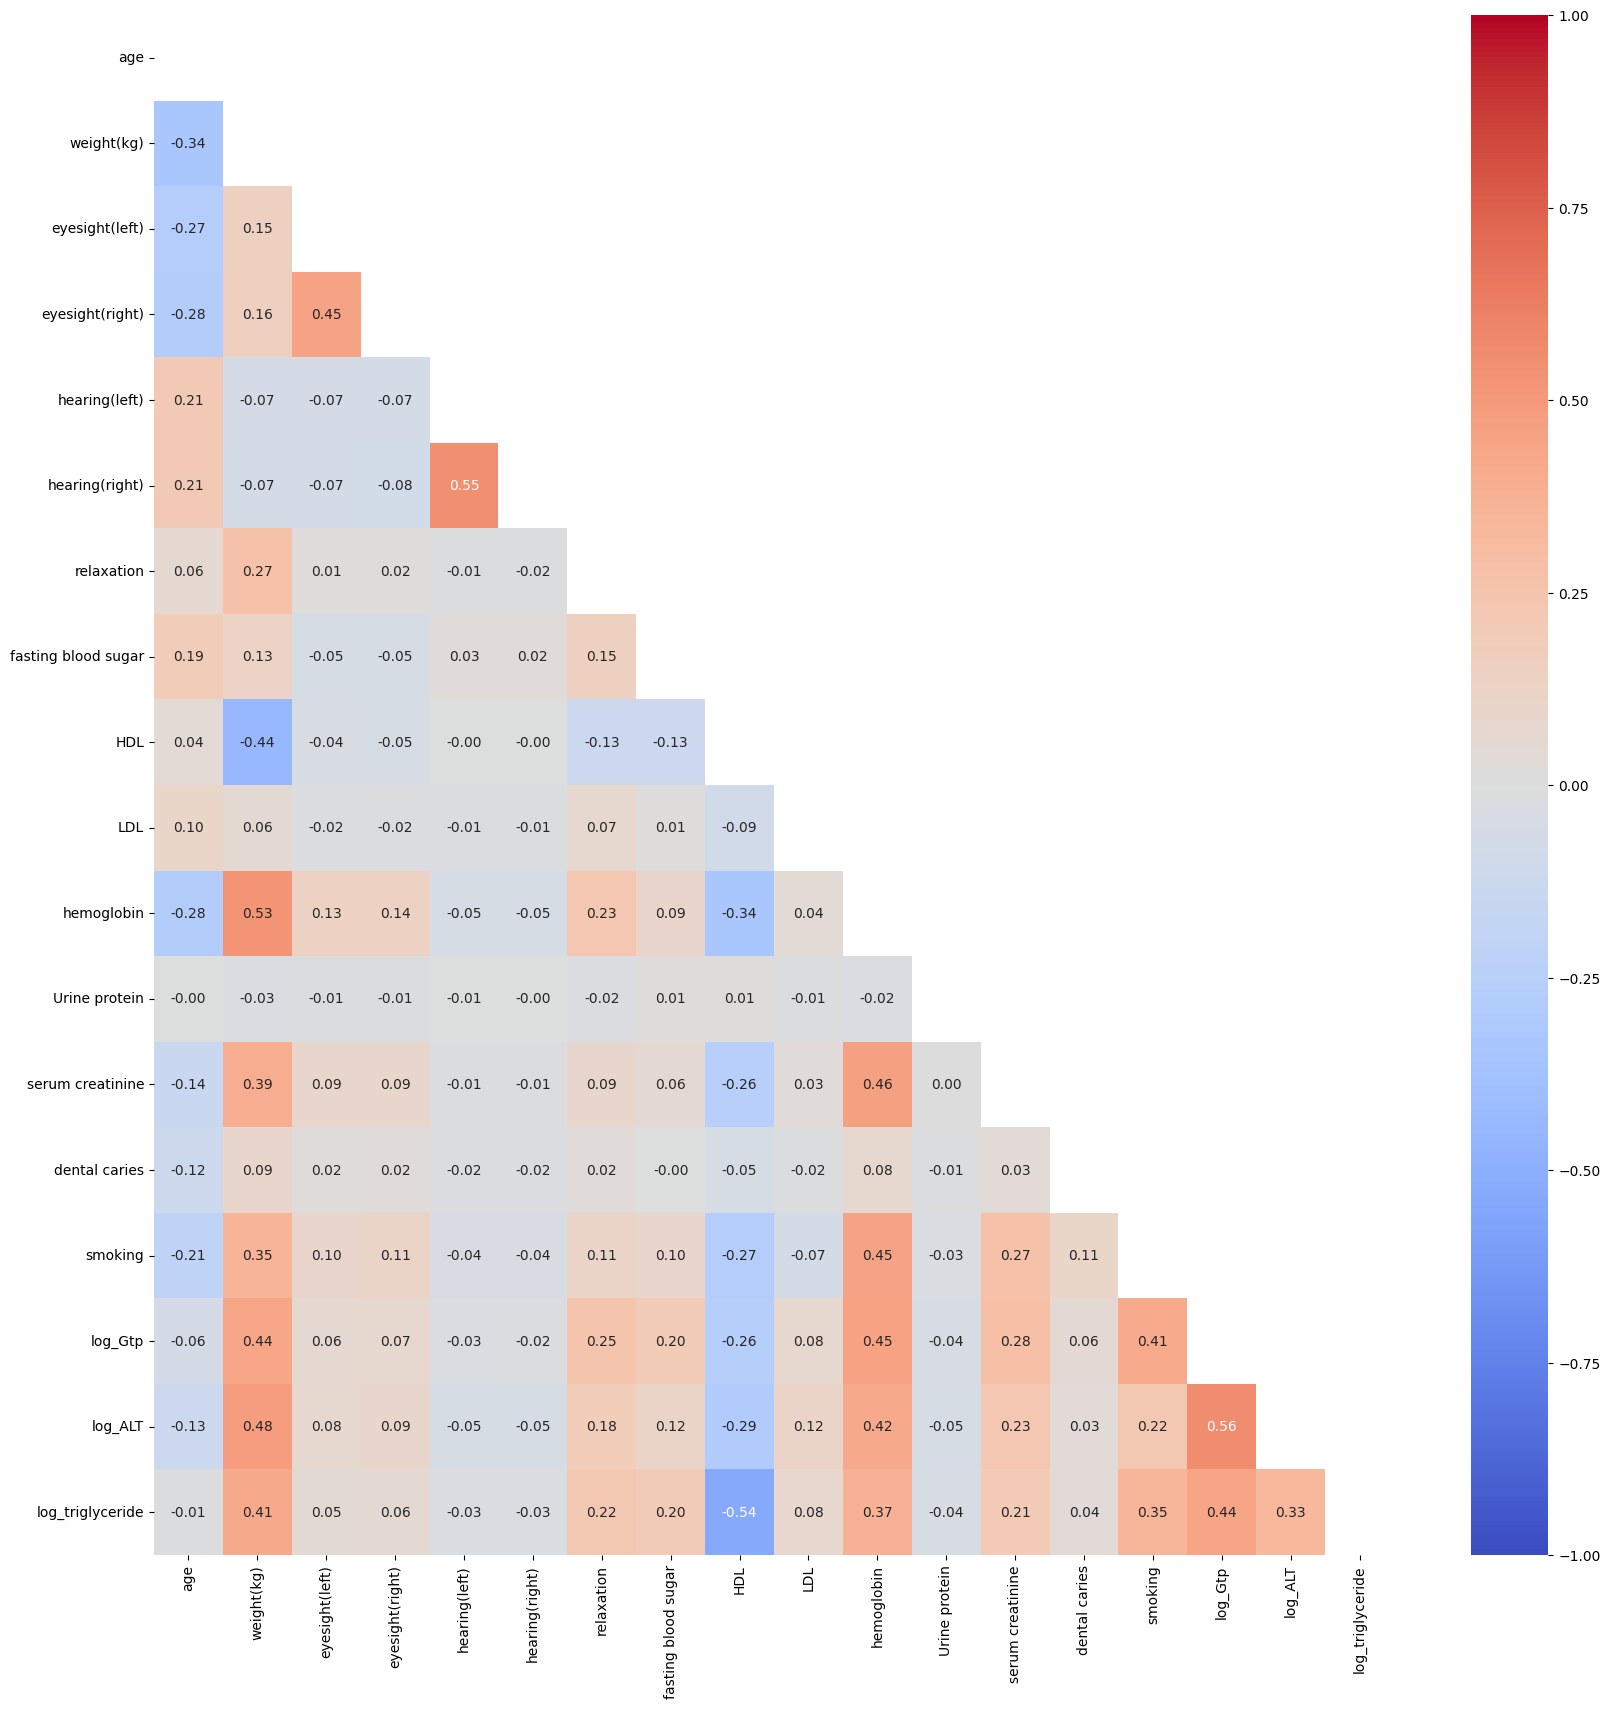

In [61]:
corr_df = processed_df.corr()
mask = np.triu(corr_df)
plt.figure(figsize=(20,20))
sns.heatmap(corr_df,
            annot = True, 
            fmt= ".2f",
            mask = mask,
            vmin = -1, vmax = 1,
            cmap = "coolwarm")
plt.show()

---

---
<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> 7. Split Data</h1>

</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 7.1 Split Original Data</h2>
</div>

In [62]:
# Split X and y
X = df.drop(columns=["smoking"])
y = df["smoking"]

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y,random_state=42)


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 7.2 Split Processed Data</h2>
</div>

In [63]:
# Split X and y
X_processed = processed_df.drop(columns=["smoking"])
y_processed = processed_df["smoking"]

# Split train and test data
X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(X_processed,y_processed,test_size=0.25,stratify=y_processed,random_state=42)

---
<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> 8. Base Model Training</h1>

</div>

### Model Performance DF

In [64]:
model_perf_df = pd.DataFrame(columns=["model","params","train_AUC","test_AUC"])

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 8.1 Base Logistic Regression</h2>
    
|Preprocessing|Scaling|Model|
|:---:|:---:|:---:|
|`No`|`Standard`|`Logistic Regression`|
    
</div>

In [65]:
def logit(X_train,y_train,X_test,y_test,model_perf,model_name,save = True):

    # Set hyperparameters grid
    params_grid = {"logit__C":[10**i for i in range(-7,8,1)]}
    
    # Create 5-fold CV
    my_cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

    # Create pipeline
    pipe = Pipeline([("ss",StandardScaler()),
                     ("logit",LogisticRegression())])

    # Grid Search
    gs = GridSearchCV(pipe,
                      param_grid=params_grid,
                      n_jobs = -1,
                      cv = my_cv,
                      scoring="roc_auc",
                      verbose = 1)

    gs.fit(X_train,y_train)
    
    best_params = gs.best_params_
    print(f"The best parameters is \n{best_params}")
    
    train_AUC = round(gs.best_score_,4)
    print(f"ROC-AUC score (Train Data) = {train_AUC}")
    test_AUC = round(gs.score(X_test,y_test),4)
    print(f"ROC-AUC score (Test Data) = {test_AUC}")
    
    model_perf = pd.concat([model_perf,pd.DataFrame([{"model":model_name,
                                                      "params":best_params,
                                                      "train_AUC":train_AUC,
                                                      "test_AUC":test_AUC}])])
    
    

    #save your model or results
    if save:
        joblib.dump(gs, f"{model_name}.pkl")
    
    return (gs,model_perf)

Un-comment this cell to run the model

In [66]:

# logit_gs, model_perf_df = logit(X_train,y_train,
#                           X_test,y_test,
#                           model_perf_df,
#                           model_name = "LogReg")
# logit_gs

In [67]:
# model_perf_df

---

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 8.2 Base Logistic Regression</h2>
    
|Preprocessing|Scaling|Model|
|:---:|:---:|:---:|
|`Yes`|`Standard`|`Logistic Regression`|
    
</div>

Un-comment this cell to run the model

In [68]:
# logit_processed_gs, model_perf_df = logit(X_train_processed,y_train_processed,
#                                 X_test_processed,y_test_processed,
#                                 model_perf_df,
#                                 model_name = "LogReg_Processed")
# logit_processed_gs

In [69]:
# model_perf_df

The model has slightly improved.

---
<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> 9. Outlier  Removal</h1>

</div>

In [70]:
no_out_df = df.copy()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 9.1 Outlier Removal - <b><i>eyesight</i></b></h2>
</div>

In [71]:
no_out_df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


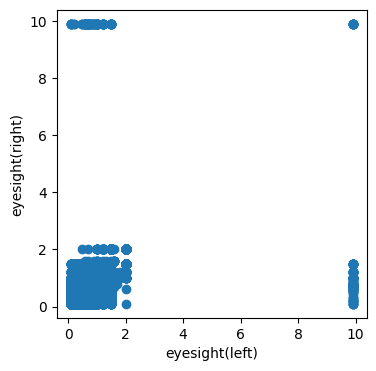

In [72]:

plt.figure(figsize=(4,4))
plt.scatter(no_out_df["eyesight(left)"],no_out_df["eyesight(right)"])
plt.xlabel("eyesight(left)")
plt.ylabel("eyesight(right)")
plt.show()


In [73]:
no_out_df = no_out_df[(no_out_df["eyesight(left)"] <= 2.5)|(no_out_df["eyesight(right)"] <= 2.5)]
no_out_df.shape

(159248, 23)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 9.2 Outlier Removal - <b><i>fasting blood sugar</i></b></h2>
</div>

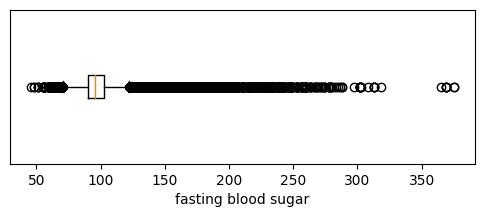

In [74]:

plt.figure(figsize=(6,2))
plt.boxplot(no_out_df["fasting blood sugar"],vert = False)
plt.xlabel("fasting blood sugar")
plt.yticks([])
plt.show()


We treat all data with more than 350 fasting blood sugar as outlier.

In [75]:
no_out_df = no_out_df[(no_out_df["fasting blood sugar"] <= 350)]
no_out_df.shape

(159241, 23)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 9.3 Outlier Removal - <b><i>LDL</i></b></h2>
</div>

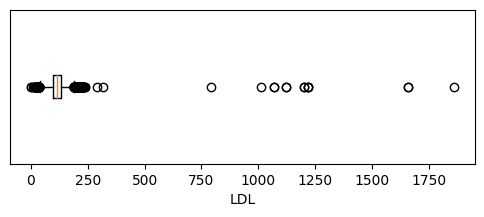

In [76]:

plt.figure(figsize=(6,2))
plt.boxplot(no_out_df["LDL"],vert = False)
plt.xlabel("LDL")
plt.yticks([])
plt.show()


We treat all data with more than 500 LDL as outlier.

In [77]:
no_out_df = no_out_df[(no_out_df["LDL"] <= 500)]
no_out_df.shape

(159227, 23)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 9.4 Split Outlier-removed Data</h2>
</div>

In [78]:
# Split X and y
X_no_out = no_out_df.drop(columns=["smoking"])
y_no_out = no_out_df["smoking"]

# Split train and test data
X_train_no_out, X_test_no_out, y_train_no_out, y_test_no_out = train_test_split(X_no_out,y_no_out,test_size=0.25,random_state=42)


---
<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> 10. Model Training (Cont'd)</h1>

</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.1 Logistic Regression</h2>
    
|Preprocessing|Scaling|Outlier Removal|Model|
|:---:|:---:|:---:|:---:|
|`Yes`|`Standard`|`Yes`|`Logistic Regression`|
    
</div>

Un-comment this cell to run the model

In [79]:
# logit_no_out_gs, model_perf_df = logit(X_train_no_out,y_train_no_out,
#                           X_test_no_out,y_test_no_out,
#                           model_perf_df,
#                           model_name = "LogReg_No_Out")
# logit_no_out_gs

In [80]:
# model_perf_df

It seems that removing outlier does not help a lot.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.2 Naïve Bayes</h2>
    
|Preprocessing|Scaling|Outlier Removal|Model|
|:---:|:---:|:---:|:---:|
|`No`|`Standard`|`No`|`Naïve Bayes`|
    
</div>

In [81]:
def gnb(X_train,y_train,X_test,y_test,model_perf,model_name,save = True):

    # Set hyperparameters grid
    params_grid = {}
    
    # Create 5-fold CV
    my_cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

    # Create pipeline
    pipe = Pipeline([("ss",StandardScaler()),
                     ("gnb",GaussianNB())])

    # Grid Search
    gs = GridSearchCV(pipe,
                      param_grid=params_grid,
                      n_jobs = -1,
                      cv = my_cv,
                      scoring="roc_auc",
                      verbose = 1)

    gs.fit(X_train,y_train)
    
    best_params = gs.best_params_
    print(f"The best parameters is \n{best_params}")
    
    train_AUC = round(gs.best_score_,4)
    print(f"ROC-AUC score (Train Data) = {train_AUC}")
    test_AUC = round(gs.score(X_test,y_test),4)
    print(f"ROC-AUC score (Test Data) = {test_AUC}")
    
    model_perf = pd.concat([model_perf,pd.DataFrame([{"model":model_name,
                                                      "params":best_params,
                                                      "train_AUC":train_AUC,
                                                      "test_AUC":test_AUC}])])
    
    

    #save your model or results
    if save:
        joblib.dump(gs, f"{model_name}.pkl")
    
    return (gs,model_perf)

Un-comment this cell to run the model

In [82]:
# gnb_gs, model_perf_df = gnb(X_train,y_train,
#                               X_test,y_test,
#                               model_perf_df,
#                               model_name = "NaiveBayes")
# gnb_gs

In [83]:
# model_perf_df

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.3 Naïve Bayes</h2>
    
|Preprocessing|Scaling|Outlier Removal|Model|
|:---:|:---:|:---:|:---:|
|`Yes`|`Standard`|`No`|`Naïve Bayes`|
    
</div>

Un-comment this cell to run the model

In [84]:
# gnb_processed_gs, model_perf_df = gnb(X_train_processed,y_train_processed,
#                                       X_test_processed,y_test_processed,
#                                       model_perf_df,
#                                       model_name = "NaiveBayes_Processed")
# gnb_processed_gs

In [85]:
# model_perf_df

---

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.4 Naïve Bayes</h2>
    
|Preprocessing|Scaling|Outlier Removal|PCA|Model|
|:---:|:---:|:---:|:---:|:---:|
|`No`|`Standard`|`No`|`Yes`|`Naïve Bayes`|
    
</div>

In [86]:
def gnb_pca(X_train,y_train,X_test,y_test,model_perf,model_name,save = True):

    # Set hyperparameters grid
    params_grid = {"pca__n_components":[0.8,0.85,0.9,0.95],}
    
    # Create 5-fold CV
    my_cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

    # Create pipeline
    pipe = Pipeline([("ss",StandardScaler()),
                     ("pca",PCA()),
                     ("gnb",GaussianNB())])

    # Grid Search
    gs = GridSearchCV(pipe,
                      param_grid=params_grid,
                      n_jobs = -1,
                      cv = my_cv,
                      scoring="roc_auc",
                      verbose = 1)

    gs.fit(X_train,y_train)
    
    best_params = gs.best_params_
    print(f"The best parameters is \n{best_params}")
    
    train_AUC = round(gs.best_score_,4)
    print(f"ROC-AUC score (Train Data) = {train_AUC}")
    test_AUC = round(gs.score(X_test,y_test),4)
    print(f"ROC-AUC score (Test Data) = {test_AUC}")
    
    model_perf = pd.concat([model_perf,pd.DataFrame([{"model":model_name,
                                                      "params":best_params,
                                                      "train_AUC":train_AUC,
                                                      "test_AUC":test_AUC}])])
    
    

    #save your model or results
    if save:
        joblib.dump(gs, f"{model_name}.pkl")
    
    return (gs,model_perf)

In [87]:
# gnb_pca_gs, model_perf_df = gnb_pca(X_train,y_train,
#                                     X_test,y_test,
#                                     model_perf_df,
#                                     model_name = "NaiveBayes_PCA")
# gnb_pca_gs

In [88]:
model_perf_df

,model,params,train_AUC,test_AUC


We can see a n improvement with PCA in Naive Bayes model.  
Let's try PCA on the base model as well.

---

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.5 Logistic Regression</h2>
    
|Preprocessing|Scaling|Outlier Removal|PCA|Model|
|:---:|:---:|:---:|:---:|:---:|
|`No`|`Standard`|`No`|`Yes`|`Logistic Regression`|
    
</div>

# Logit - Standard Scaler + PCA

In [89]:
def logit_pca(X_train,y_train,X_test,y_test,model_perf,model_name,save = True):

    # Set hyperparameters grid
    params_grid = {"logit__C":[10**i for i in range(-7,8,1)],
                   "pca__n_components":[0.8,0.85,0.9,0.95],}
    
    # Create 5-fold CV
    my_cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

    # Create pipeline
    pipe = Pipeline([("ss",StandardScaler()),
                     ("pca",PCA()),
                     ("logit",LogisticRegression())])

    # Grid Search
    gs = GridSearchCV(pipe,
                      param_grid=params_grid,
                      n_jobs = -1,
                      cv = my_cv,
                      scoring="roc_auc",
                      verbose = 1)

    gs.fit(X_train,y_train)
    
    best_params = gs.best_params_
    print(f"The best parameters is \n{best_params}")
    
    train_AUC = round(gs.best_score_,4)
    print(f"ROC-AUC score (Train Data) = {train_AUC}")
    test_AUC = round(gs.score(X_test,y_test),4)
    print(f"ROC-AUC score (Test Data) = {test_AUC}")
    
    model_perf = pd.concat([model_perf,pd.DataFrame([{"model":model_name,
                                                      "params":best_params,
                                                      "train_AUC":train_AUC,
                                                      "test_AUC":test_AUC}])])
    
    

    #save your model or results
    if save:
        joblib.dump(gs, f"{model_name}.pkl")
    
    return (gs,model_perf)

In [90]:
# logit_pca_gs, model_perf_df = logit_pca(X_train,y_train,
#                                     X_test,y_test,
#                                     model_perf_df,
#                                     model_name = "LogReg_PCA")
# logit_pca_gs

In [91]:
model_perf_df

,model,params,train_AUC,test_AUC


PCA with Logistic Regression does not improve much.

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.6 Random Forest</h2>
    
|Preprocessing|Scaling|Outlier Removal|PCA|Model|
|:---:|:---:|:---:|:---:|:---:|
|`No`|`No`|`No`|`No`|`Random Forest`|
    
</div>

In [92]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV


def rf_1(X_train,y_train,X_test,y_test,model_name,save = True):
    
    # Preprocessing
    
    # Set hyperparameters grid
    params_grid = {
        "rf__n_estimators":[72],
        "rf__max_depth":[11],#i for i in range(5,15,2)],
        "rf__min_samples_leaf":[100],#i for i in range(80,120,10)]
        "rf__class_weight":["balanced_subsample"],
                  }
    
    # Create 5-fold CV
    my_cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

    # Create pipeline
    pipe = Pipeline([
        ("rf",RandomForestClassifier())]
    )

    # Grid Search
    gs = GridSearchCV(pipe,
                      param_grid=params_grid,
                      n_jobs = -1,
                      cv = my_cv,
                      scoring="roc_auc",
                      verbose = 1)

    gs.fit(X_train,y_train)
    
    best_params = gs.best_params_
    print(f"The best parameters is \n{best_params}")
    
    train_AUC = round(gs.best_score_,4)
    print(f"ROC-AUC score (Train Data) = {train_AUC}")
    test_AUC = round(gs.score(X_test,y_test),4)
    print(f"ROC-AUC score (Test Data) = {test_AUC}")    
    

    #save your model or results
    if save:
        joblib.dump(gs, f"{model_name}.pkl")
    
    # Generating final test data output
    print("\nReading final test data.")
    final_test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col = 0)
    final_index = final_test_data.index
    
    # Final Test Data Preprocessing
    
    
    # Making final prediction
    print("Start Prediction...")
    final_y_prob = pd.DataFrame(gs.predict_proba(final_test_data)[:,1],
                          index = final_index,
                          columns=["smoking"])
    final_y_prob.to_csv("/kaggle/working/submission.csv")
    print("Prediction Exported...")
    
    return final_y_prob

In [93]:
#rf_1(X_train,y_train,X_test,y_test,"rf_1")

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.7 Random Forest</h2>
    
|Preprocessing|Scaling|Outlier Removal|Feature Selection|Model|
|:---:|:---:|:---:|:---:|:---:|
|`Yes`|`No`|`No`|`Yes`|`Random Forest`|
    
</div>

# Random Forest - 2

In [94]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

def rf_log_transform(df):
    new_df = df.copy()
    
    # Log Transformation
    log_cols = ["Gtp","AST","ALT","triglyceride",
                "HDL","LDL","fasting blood sugar","serum creatinine"]
    for col in log_cols:
        if col in df.columns:
            new_df[f"log_{col}"] = np.log(new_df[col]+1)
        else:
            continue
    return new_df

def rf_interaction(df):
    new_df = df.copy()
    
    # Log Transformation
    pairs = [("AST","ALT"),
             ("HDL","LDL"),
             ("eyesight(left)","eyesight(right)"),
             ("hearing(left)","hearing(right)"),
             ("systolic","relaxation"),
             ("weight(cm)","height(kg)"),
             ("weight(cm)","waist(cm)")]
    for pair in pairs:
        x = pair[0]
        y = pair[1]
        if (x in df.columns) and (y in df.columns):
            new_df[f"inter_{x}_{y}"] = df[x] * df[y]
        else:
            continue
    return new_df

def rf_remove_outlier(df):
    new_df = df.copy()
    
    # Based on the analyse above
#     new_df = new_df[(new_df["Cholesterol"] <= 350)]
#     new_df = new_df[(new_df["triglyceride"] <= 500)]
#     new_df = new_df[(new_df["ALT"] <= 100)]
#     new_df = new_df[(new_df["AST"] <= 100)]
#     new_df = new_df[(new_df["Gtp"] <= 300)]
#     new_df = new_df[(new_df["serum creatinine"] <= 2.5)]
#     new_df = new_df[(new_df["LDL"] <= 500)]
#     new_df = new_df[(new_df["fasting blood sugar"] <= 350)]
#     new_df = new_df[(new_df["eyesight(left)"] <= 2.5) | (new_df["eyesight(right)"] <= 2.5)]
    
    return new_df

def rf_drop_col(df):
    new_df = df.copy()
    drop_cols = []#["Gtp","AST","ALT","triglyceride",
                #"HDL","LDL","fasting blood sugar","serum creatinine"]
    for col in drop_cols:
        if col in new_df.columns:
            new_df.drop(columns=[col],inplace = True)
        else:
            continue
    
    return new_df


def rf_2(X_train,y_train,X_test,y_test,model_name,save = True):
    
    # Preprocessing
    X_train = rf_log_transform(X_train)
    X_test = rf_log_transform(X_test)
    
    X_train = rf_interaction(X_train)
    X_test = rf_interaction(X_test)
    
    # Feature Selection
    X_train = rf_drop_col(X_train)
    X_test = rf_drop_col(X_test)
    
    # Set hyperparameters grid
    params_grid = {
        "rf__n_estimators":[170,190,210],
        "rf__max_depth":[30,40,50],
        "rf__min_samples_leaf":[90,110,130],
                  }
    
    # Create 5-fold CV
    my_cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

    # Create pipeline
    pipe = Pipeline([
        ("rf",RandomForestClassifier())]
    )

    # Grid Search
    gs = GridSearchCV(pipe,
                      param_grid=params_grid,
                      n_jobs = -1,
                      cv = my_cv,
                      scoring="roc_auc",
                      verbose = 1)

    gs.fit(X_train,y_train)
    
    best_params = gs.best_params_
    print(f"The best parameters is \n{best_params}")
    
    train_AUC = round(gs.best_score_,4)
    print(f"ROC-AUC score (Train Data) = {train_AUC}")
    test_AUC = round(gs.score(X_test,y_test),4)
    print(f"ROC-AUC score (Test Data) = {test_AUC}")    
    

    #save your model or results
    if save:
        joblib.dump(gs, f"{model_name}.pkl")
    
    # Generating final test data output
    print("\nReading final test data.")
    final_test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col = 0)
    final_index = final_test_data.index
    
    # Final Test Data Preprocessing
    final_test_data = rf_log_transform(final_test_data)
    final_test_data = rf_interaction(final_test_data)
    final_test_data = rf_drop_col(final_test_data)
    
    
    # Making final prediction
    print("Start Prediction...")
    final_y_prob = pd.DataFrame(gs.predict_proba(final_test_data)[:,1],
                          index = final_index,
                          columns=["smoking"])
    final_y_prob.to_csv("/kaggle/working/submission.csv")
    print("Prediction Exported...")
    
    return pd.DataFrame(gs.cv_results_)

In [95]:
# rf_2(X_train,y_train,X_test,y_test,"rf_2")

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.8 Neural Network</h2>
    
- 4 Hidden Dense Layers (128, 64, 32, 16) with `relu` activation
- Dropout = `0.1`
    
</div>

In [96]:
def nn_1(X_train,y_train,X_test,y_test,model_name,save = True):

    # Model Instantiate
    model = Sequential()

    model.add(Dense(units = 128,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 64,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 32,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 16,activation = "relu"))
    model.add(Dropout(0.1))
    
    model.add(Dense(units = 1,activation = "sigmoid"))

    # Compile Model
    model.compile(
        optimizer=Adagrad(0.01),
        metrics=AUC(),
        loss=BinaryCrossentropy()
    )
    
    # Train the network
    history = model.fit(X_train, y_train, 
                        epochs=250,
                        batch_size=128,
                        validation_data=(X_test,y_test),
                        callbacks=EarlyStopping(patience=10),
                        verbose=1)
    
    # Evaluate the network
    train_val_col = list(filter(lambda col: ("auc" in col) & ("val" not in col),history.history.keys()))[0]
    train_accuracy = history.history[train_val_col][-1]
    result = model.evaluate(X_test,y_test, verbose=0)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {result[1]:.4f}")
    
    # Save model
    if save:
        model.save(f"{model_name}.keras")
        print("Model Saved...")
        
    return (model,history)

In [97]:
# nn_model_1, nn_model_1_history = nn_1(X_train,y_train,X_test,y_test,"Simple_NN")

# final_test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col = 0)

# print("Start Prediction...")
# y_pred = pd.DataFrame(nn_model_1.predict(final_test_data),
#                       index = final_test_data.index,
#                       columns=["smoking"])
# y_pred.to_csv("/kaggle/working/submission.csv")
# print("Prediction Exported...")
# y_pred

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.9 Neural Network</h2>
    
- 5 Hidden Dense Layers (256, 128, 64, 32, 16) with `relu` activation
- Dropout = `0.1`
    
</div>

In [98]:
def nn_2(X_train,y_train,X_test,y_test,model_name,save = True):

    nn_ss = StandardScaler()
    X_train = nn_ss.fit_transform(X_train)
    X_test = nn_ss.transform(X_test)
    
    # Model Instantiate
    model = Sequential()

    model.add(Dense(units = 256,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 128,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 64,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 32,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 16,activation = "relu"))
    model.add(Dropout(0.1))
    
    model.add(Dense(units = 1,activation = "sigmoid"))

    # Compile Model
    model.compile(
        optimizer=Adagrad(0.01),
        metrics=AUC(),
        loss=BinaryCrossentropy()
    )
    
    # Train the network
    history = model.fit(X_train, y_train, 
                        epochs=250,
                        batch_size=128,
                        validation_data=(X_test,y_test),
                        callbacks=EarlyStopping(patience=10),
                        verbose=1)
    
    # Evaluate the network
    train_val_col = list(filter(lambda col: ("auc" in col) & ("val" not in col),history.history.keys()))[0]
    train_accuracy = history.history[train_val_col][-1]
    result = model.evaluate(X_test,y_test, verbose=0)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {result[1]:.4f}")
    
    # Save model
    if save:
        model.save(f"{model_name}.keras")
        print("Model Saved...")
        
    # Generating final test data output
    final_test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col = 0)
    final_index = final_test_data.index
    
    # Preprocessing
    final_test_data = nn_ss.transform(final_test_data)

    print("\nStart Prediction...")
    y_pred = pd.DataFrame(model.predict(final_test_data),
                          index = final_index,
                          columns=["smoking"])
    y_pred.to_csv("/kaggle/working/submission.csv")
    print("Prediction Exported...")
        
    return (model,history,y_pred)

In [99]:
# nn_model_2, nn_model_2_history, nn_model_2_y_pred = nn_2(X_train,y_train,X_test,y_test,"Simple_NN_scaled")
# nn_model_2_y_pred

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.10 Neural Network</h2>

- Standard Scaler
- PCA (95% of component)
- 5 Hidden Dense Layers (256, 128, 64, 32, 16) with `relu` activation
- Dropout = `0.1`
    
</div>

In [100]:
def nn_3(X_train,y_train,X_test,y_test,model_name,save = True):
    
    # Scale the data
    nn_ss = StandardScaler()
    X_train = nn_ss.fit_transform(X_train)
    X_test = nn_ss.transform(X_test)
    
    # Apply PCA on the data
    nn_pca = PCA(n_components=0.95)
    X_train = nn_pca.fit_transform(X_train)
    X_test = nn_pca.transform(X_test)
    
    # Model Instantiate
    model = Sequential()

    model.add(Dense(units = 256,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 128,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 64,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 32,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 16,activation = "relu"))
    model.add(Dropout(0.1))
    
    model.add(Dense(units = 1,activation = "sigmoid"))

    # Compile Model
    model.compile(
        optimizer=Adagrad(0.01),
        metrics=AUC(),
        loss=BinaryCrossentropy()
    )
    
    # Train the network
    history = model.fit(X_train, y_train, 
                        epochs=200,
                        batch_size=128,
                        validation_data=(X_test,y_test),
                        callbacks=EarlyStopping(patience=10),
                        verbose=1)
    
    # Evaluate the network
    train_val_col = list(filter(lambda col: ("auc" in col) & ("val" not in col),history.history.keys()))[0]
    train_accuracy = history.history[train_val_col][-1]
    result = model.evaluate(X_test,y_test, verbose=0)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {result[1]:.4f}")
    
    # Save model
    if save:
        model.save(f"{model_name}.keras")
        print("Model Saved...")
        
    # Generating final test data output
    final_test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col = 0)
    final_index = final_test_data.index
    
    # Preprocessing
    final_test_data = nn_ss.transform(final_test_data)
    final_test_data = nn_pca.transform(final_test_data)

    print("\nStart Prediction...")
    y_pred = pd.DataFrame(model.predict(final_test_data),
                          index = final_index,
                          columns=["smoking"])
    y_pred.to_csv("/kaggle/working/submission.csv")
    print("Prediction Exported...")
        
    return (model,history,y_pred)

In [101]:
# nn_model_3, nn_model_3_history,nn_model_3_y_pred = nn_3(X_train,y_train,X_test,y_test,"Simple_NN_scaled_pca")
# nn_model_3_y_pred

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.11 Neural Network</h2>

- Standard Scaler
- 6 Hidden Dense Layers (512, 256, 128, 64, 32, 16) with `relu` activation
- Dropout = `0.1`
    
</div>

In [102]:
def nn_4(X_train,y_train,X_test,y_test,model_name,save = True):
    
    # Scale the data
    nn_ss = StandardScaler()
    X_train = nn_ss.fit_transform(X_train)
    X_test = nn_ss.transform(X_test)
    
    # Model Instantiate
    model = Sequential()

    model.add(Dense(units = 512,activation = "relu"))
    model.add(Dropout(0.1))
    
    model.add(Dense(units = 256,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 128,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 64,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 32,activation = "relu"))
    model.add(Dropout(0.1))

    model.add(Dense(units = 16,activation = "relu"))
    model.add(Dropout(0.1))
    
    model.add(Dense(units = 1,activation = "sigmoid"))

    # Compile Model
    model.compile(
        optimizer=Adagrad(0.01),
        metrics=AUC(),
        loss=BinaryCrossentropy()
    )
    
    # Train the network
    history = model.fit(X_train, y_train, 
                        epochs=200,
                        batch_size=128,
                        validation_data=(X_test,y_test),
                        callbacks=EarlyStopping(patience=10),
                        verbose=1)
    
    # Evaluate the network
    train_val_col = list(filter(lambda col: ("auc" in col) & ("val" not in col),history.history.keys()))[0]
    train_accuracy = history.history[train_val_col][-1]
    result = model.evaluate(X_test,y_test, verbose=0)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {result[1]:.4f}")
    
    # Save model
    if save:
        model.save(f"{model_name}.keras")
        print("Model Saved...")
        
    # Generating final test data output
    final_test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col = 0)
    final_index = final_test_data.index
    
    # Preprocessing
    final_test_data = nn_ss.transform(final_test_data)

    print("\nStart Prediction...")
    y_pred = pd.DataFrame(model.predict(final_test_data),
                          index = final_index,
                          columns=["smoking"])
    y_pred.to_csv("/kaggle/working/submission.csv")
    print("Prediction Exported...")
        
    return (model,history,y_pred)

In [103]:
# nn_model_4, nn_model_4_history,nn_model_4_y_pred = nn_4(X_train,y_train,X_test,y_test,"Simple_NN_512_scaled")
# nn_model_4_y_pred

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.12 Neural Network</h2>

- Remove Outlier
- Log Transformation
- Scaling
- 6 Hidden Dense Layers (512, 256, 128, 64, 32, 16) with `leakyrelu` activation
- Dropout = `0.1`
    
</div>

In [104]:
def nn_log_transform(df):
    new_df = df.copy()
    
    # Log Transformation
    log_cols = ["Gtp","AST","ALT","triglyceride"]
    for col in log_cols:
        if col in df.columns:
            new_df[f"log_{col}"] = np.log(new_df[col]+1)
        else:
            continue
    return new_df


def nn_remove_outlier(df):
    new_df = df.copy()
    
    # Based on the analyse above
    new_df = new_df[(new_df["LDL"] <= 500)]
    new_df = new_df[(new_df["fasting blood sugar"] <= 350)]
    new_df = new_df[(new_df["eyesight(left)"] <= 2.5)| (new_df["eyesight(right)"] <= 2.5)]
    
    return new_df
    
    
def nn_5(X_train,y_train,X_test,y_test,model_name,save = True):
    
    # Remove Outlier
    X_train = nn_remove_outlier(X_train)
    X_test = nn_remove_outlier(X_test)
    
    # Drop corresponding y 
    y_train = y_train.loc[X_train.index,]
    y_test = y_test.loc[X_test.index,]
    
    # Add Log Transform
    X_train = nn_log_transform(X_train)
    X_test = nn_log_transform(X_test)
    
    # Scale the data with different scaler
    min_max_col = ["hearing(left)","hearing(right)","Urine protein","dental caries"] # For ordinal discrete features
    robust_col = ["eyesight(left)","eyesight(right)","LDL","fasting blood sugar"] # For feature with outlier
    scaler_col = list(filter(lambda col: (col not in min_max_col)&(col not in robust_col),X_train.columns))
    
    nn_ctr = make_column_transformer((StandardScaler(), scaler_col),
                                  (MinMaxScaler(), min_max_col),
                                  (RobustScaler(),robust_col),
                                  remainder = "passthrough",
                                  verbose_feature_names_out = False)
    nn_ctr.set_output(transform ="pandas")
    X_train = nn_ctr.fit_transform(X_train)
    X_test = nn_ctr.transform(X_test)
    
    
    # Model Instantiate
    model = Sequential()

    model.add(Dense(units = 512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    
    model.add(Dense(units = 256))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))

    model.add(Dense(units = 128))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))

    model.add(Dense(units = 64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))

    model.add(Dense(units = 32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))

    model.add(Dense(units = 16))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    
    model.add(Dense(units = 1,activation = "sigmoid"))

    # Compile Model
    model.compile(
        optimizer=Adagrad(0.01),
        metrics=AUC(),
        loss=BinaryCrossentropy()
    )
    
    # Train the network
    history = model.fit(X_train, y_train, 
                        epochs=50,
                        batch_size=128,
                        validation_data=(X_test,y_test),
                        callbacks=EarlyStopping(patience=10),
                        verbose=1)
    
    # Evaluate the network
    train_val_col = list(filter(lambda col: ("auc" in col) & ("val" not in col),history.history.keys()))[0]
    train_accuracy = history.history[train_val_col][-1]
    result = model.evaluate(X_test,y_test, verbose=0)

    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {result[1]:.4f}")
    
    # Save model
    if save:
        model.save(f"{model_name}.keras")
        print("Model Saved...")
        
    # Generating final test data output
    print("\nReading final test data.")
    final_test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col = 0)
    final_index = final_test_data.index
    
    # Preprocessing
    final_test_data = nn_log_transform(final_test_data)
    final_test_data = nn_ctr.transform(final_test_data)

    print("Start Prediction...")
    y_pred = pd.DataFrame(model.predict(final_test_data),
                          index = final_index,
                          columns=["smoking"])
    y_pred.to_csv("/kaggle/working/submission.csv")
    print("Prediction Exported...")
        
    return (model,history,y_pred)

In [105]:
# nn_model_5, nn_model_5_history,nn_model_5_y_pred = nn_5(X_train_no_out,y_train_no_out,
#                                                         X_test_no_out,y_test_no_out,
#                                                         "Simple_NN_512_scaled_custom_transform")
# nn_model_5_y_pred

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.13 Neural Network</h2>

- Remove Outlier
- Log Transformation
- Scaling
- 7 Hidden Dense Layers (512, 256, 128, 64, 32, 16, 8) with `leakyrelu` activation
- Dropout = `0.1`
    
</div>

In [106]:


def nn_log_transform(df):
    new_df = df.copy()
    
    # Log Transformation
    log_cols = ["Gtp","AST","ALT","triglyceride"]
    for col in log_cols:
        if col in df.columns:
            new_df[f"log_{col}"] = np.log(new_df[col]+1)
        else:
            continue
    return new_df

def nn_remove_outlier(df):
    new_df = df.copy()
    
    # Based on the analyse above
#     new_df = new_df[(new_df["Cholesterol"] <= 350)]
#     new_df = new_df[(new_df["triglyceride"] <= 500)]
#     new_df = new_df[(new_df["ALT"] <= 100)]
#     new_df = new_df[(new_df["AST"] <= 100)]
#     new_df = new_df[(new_df["Gtp"] <= 300)]
#     new_df = new_df[(new_df["serum creatinine"] <= 2.5)]
    new_df = new_df[(new_df["LDL"] <= 500)]
    new_df = new_df[(new_df["fasting blood sugar"] <= 350)]
    new_df = new_df[(new_df["eyesight(left)"] <= 2.5) | (new_df["eyesight(right)"] <= 2.5)]
    
    return new_df

def nn_drop_col(df):
    new_df = df.copy()
    drop_cols = []#"hearing(left)","hearing(right)","eyesight(left)","eyesight(right)","Urine protein","LDL","Cholesterol"]
    for col in drop_cols:
        if col in new_df.columns:
            new_df.drop(columns=[col],inplace = True)
        else:
            continue
    
    return new_df
    

def nn_6(X_train,y_train,X_test,y_test,model_name,save = True):
        
    # Remove Outlier
    X_train = nn_remove_outlier(X_train)
    # Drop corresponding y 
    y_train = y_train.loc[X_train.index,]
    
    # Add Log Transform
    X_train = nn_log_transform(X_train)
    X_test = nn_log_transform(X_test)
    
    # Scale the data with different scaler
    min_max_col = ["hearing(left)","hearing(right)","Urine protein","dental caries"] # For ordinal discrete features
    min_max_col = list(filter(lambda col: col in X_train.columns,min_max_col))
    robust_col = ["eyesight(left)","eyesight(right)","LDL","fasting blood sugar"] # For feature with outlier
    robust_col = list(filter(lambda col: col in X_train.columns,robust_col))
    scaler_col = list(filter(lambda col: (col not in min_max_col)&(col not in robust_col),X_train.columns))
    
    nn_ctr = make_column_transformer((StandardScaler(), scaler_col),
                                  (MinMaxScaler(), min_max_col),
                                  (RobustScaler(),robust_col),
                                  remainder = "passthrough",
                                  verbose_feature_names_out = False)
    nn_ctr.set_output(transform ="pandas")
    X_train = nn_ctr.fit_transform(X_train)
    X_test = nn_ctr.transform(X_test)
    
    
    # Model Instantiate
    model = Sequential()

    model.add(Dense(units = 512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    
    model.add(Dense(units = 256))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))

    model.add(Dense(units = 128))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))

    model.add(Dense(units = 64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))

    model.add(Dense(units = 32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))

    model.add(Dense(units = 16))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))

    model.add(Dense(units = 8))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.1))
    
    model.add(Dense(units = 1,activation = "sigmoid"))

    # Compile Model
    model.compile(
        optimizer=Adagrad(0.01),
        metrics=AUC(),
        loss=BinaryCrossentropy()
    )
    
    # Train the network
    history = model.fit(X_train, y_train, 
                        epochs=200,
                        batch_size=128,
                        validation_data=(X_test,y_test),
                        callbacks=EarlyStopping(patience=10),
                        verbose=1)
    
    # Save model
    if save:
        model.save(f"{model_name}.keras")
        print("Model Saved...")
        
    # Generating final test data output
    print("\nReading final test data.")
    final_test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col = 0)
    final_index = final_test_data.index
    
    # Preprocessing
    final_test_data = nn_drop_col(final_test_data)
    final_test_data = nn_log_transform(final_test_data)
    final_test_data = nn_ctr.transform(final_test_data)

    print("Start Prediction...")
    y_pred = pd.DataFrame(model.predict(final_test_data),
                          index = final_index,
                          columns=["smoking"])
    y_pred.to_csv("/kaggle/working/submission.csv")
    print("Prediction Exported...")
        
    return (model,history,y_pred)

In [107]:
# nn_model_6, nn_model_6_history,nn_model_6_y_pred = nn_6(X_train,y_train,
#                                                         X_test,y_test,
#                                                         "Simple_NN_6")
# nn_model_6_y_pred

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.14 Neural Network</h2>

- Remove Outlier
- Log Transformation
- Scaling
- 7 Hidden Dense Layers (512, 256, 128, 64, 32, 16, 8) with `leakyrelu` activation
- Dropout = `0.15`
    
</div>

In [108]:


def nn_log_transform(df):
    new_df = df.copy()
    
    # Log Transformation
    log_cols = ["Gtp","AST","ALT","triglyceride","HDL","LDL","fasting blood sugar","serum creatinine"]
    for col in log_cols:
        if col in df.columns:
            new_df[f"log_{col}"] = np.log(new_df[col]+1)
        else:
            continue
    return new_df

def nn_remove_outlier(df):
    new_df = df.copy()
    
    # Based on the analyse above
#     new_df = new_df[(new_df["Cholesterol"] <= 350)]
#     new_df = new_df[(new_df["triglyceride"] <= 500)]
#     new_df = new_df[(new_df["ALT"] <= 100)]
#     new_df = new_df[(new_df["AST"] <= 100)]
#     new_df = new_df[(new_df["Gtp"] <= 300)]
#     new_df = new_df[(new_df["serum creatinine"] <= 2.5)]
    new_df = new_df[(new_df["LDL"] <= 500)]
    new_df = new_df[(new_df["fasting blood sugar"] <= 350)]
    new_df = new_df[(new_df["eyesight(left)"] <= 2.5) | (new_df["eyesight(right)"] <= 2.5)]
    
    return new_df

def nn_drop_col(df):
    new_df = df.copy()
    drop_cols = []#"hearing(left)","hearing(right)","eyesight(left)","eyesight(right)","Urine protein","LDL","Cholesterol"]
    for col in drop_cols:
        if col in new_df.columns:
            new_df.drop(columns=[col],inplace = True)
        else:
            continue
    
    return new_df
    

def nn_7(X_train,y_train,X_test,y_test,model_name,save = True):
    
    
    # Remove Outlier
    X_train = nn_remove_outlier(X_train)
    # Drop corresponding y 
    y_train = y_train.loc[X_train.index,]
    
    # Add Log Transform
    X_train = nn_log_transform(X_train)
    X_test = nn_log_transform(X_test)
    
    # Scale the data with different scaler
    min_max_col = ["hearing(left)","hearing(right)","Urine protein","dental caries"] # For ordinal discrete features
    min_max_col = list(filter(lambda col: col in X_train.columns,min_max_col))
    robust_col = ["eyesight(left)","eyesight(right)","LDL","fasting blood sugar"] # For feature with outlier
    robust_col = list(filter(lambda col: col in X_train.columns,robust_col))
    scaler_col = list(filter(lambda col: (col not in min_max_col)&(col not in robust_col),X_train.columns))
    
    nn_ctr = make_column_transformer((StandardScaler(), scaler_col),
                                  (MinMaxScaler(), min_max_col),
                                  (RobustScaler(),robust_col),
                                  remainder = "passthrough",
                                  verbose_feature_names_out = False)
    nn_ctr.set_output(transform ="pandas")
    X_train = nn_ctr.fit_transform(X_train)
    X_test = nn_ctr.transform(X_test)
    
    
    # Model Instantiate
    model = Sequential()

    model.add(Dense(units = 512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))
    
    model.add(Dense(units = 256))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))

    model.add(Dense(units = 128))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))

    model.add(Dense(units = 64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))

    model.add(Dense(units = 32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))

    model.add(Dense(units = 16))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))

    model.add(Dense(units = 8))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))
    
    model.add(Dense(units = 1,activation = "sigmoid"))

    # Compile Model
    model.compile(
        optimizer=Adagrad(0.01),
        metrics=AUC(),
        loss=BinaryCrossentropy()
    )
    
    # Train the network
    history = model.fit(X_train, y_train, 
                        epochs=200,
                        batch_size=128,
                        validation_data=(X_test,y_test),
                        callbacks=EarlyStopping(patience=10),
                        verbose=1)
    
    # Save model
    if save:
        model.save(f"{model_name}.keras")
        print("Model Saved...")
        
    # Generating final test data output
    print("\nReading final test data.")
    final_test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col = 0)
    final_index = final_test_data.index
    
    # Preprocessing
    final_test_data = nn_drop_col(final_test_data)
    final_test_data = nn_log_transform(final_test_data)
    final_test_data = nn_ctr.transform(final_test_data)

    print("Start Prediction...")
    y_pred = pd.DataFrame(model.predict(final_test_data),
                          index = final_index,
                          columns=["smoking"])
    y_pred.to_csv("/kaggle/working/submission.csv")
    print("Prediction Exported...")
        
    return (model,history,y_pred)

In [109]:
# nn_model_7, nn_model_7_history,nn_model_7_y_pred = nn_7(X_train,y_train,
#                                                         X_test,y_test,
#                                                         "Simple_NN_7")
# nn_model_7_y_pred

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
    <h2> 10.15 Neural Network</h2>

- Remove Outlier
- Feature Selection
- Log Transformation
- Scaling
- 7 Hidden Dense Layers (512, 256, 128, 64, 32, 16, 8) with `leakyrelu` activation
- Dropout = `0.15`
    
</div>

In [110]:

def nn_log_transform(df):
    new_df = df.copy()
    
    # Log Transformation
    log_cols = ["Gtp","AST","ALT","triglyceride",
                "HDL","LDL","fasting blood sugar","serum creatinine"]
    for col in log_cols:
        if col in df.columns:
            new_df[f"log_{col}"] = np.log(new_df[col]+1)
        else:
            continue
    return new_df

def nn_remove_outlier(df):
    new_df = df.copy()
    
    # Based on the analyse above
#     new_df = new_df[(new_df["Cholesterol"] <= 350)]
#     new_df = new_df[(new_df["triglyceride"] <= 500)]
#     new_df = new_df[(new_df["ALT"] <= 100)]
#     new_df = new_df[(new_df["AST"] <= 100)]
#     new_df = new_df[(new_df["Gtp"] <= 300)]
#     new_df = new_df[(new_df["serum creatinine"] <= 2.5)]

#     new_df = new_df[(new_df["LDL"] <= 500)]
    new_df = new_df[(new_df["fasting blood sugar"] <= 350)]
    new_df = new_df[(new_df["eyesight(left)"] <= 2.5) | (new_df["eyesight(right)"] <= 2.5)]
    
    return new_df

def nn_drop_col(df):
    new_df = df.copy()
    drop_cols = ["LDL"]#,"hearing(left)","hearing(right)","eyesight(left)","eyesight(right)","Urine protein","Cholesterol"]
    for col in drop_cols:
        if col in new_df.columns:
            new_df.drop(columns=[col],inplace = True)
        else:
            continue
    
    return new_df
    

def nn_8(X_train,y_train,X_test,y_test,model_name,save = True):
    
    # Remove Outlier
    X_train = nn_remove_outlier(X_train)
    # Drop corresponding y 
    y_train = y_train.loc[X_train.index,]
    
    # Drop Unrelated columns
    X_train = nn_drop_col(X_train)
    X_test = nn_drop_col(X_test)
    
    # Add Log Transform
    X_train = nn_log_transform(X_train)
    X_test = nn_log_transform(X_test)
    
    # Scale the data with different scaler
    min_max_col = ["hearing(left)","hearing(right)","Urine protein","dental caries"] # For ordinal discrete features
    min_max_col = list(filter(lambda col: col in X_train.columns,min_max_col))
    robust_col = ["eyesight(left)","eyesight(right)","LDL","fasting blood sugar"] # For feature with outlier
    robust_col = list(filter(lambda col: col in X_train.columns,robust_col))
    scaler_col = list(filter(lambda col: (col not in min_max_col)&(col not in robust_col),X_train.columns))
    
    nn_ctr = make_column_transformer((StandardScaler(), scaler_col),
                                  (MinMaxScaler(), min_max_col),
                                  (RobustScaler(),robust_col),
                                  remainder = "passthrough",
                                  verbose_feature_names_out = False)
    nn_ctr.set_output(transform ="pandas")
    X_train = nn_ctr.fit_transform(X_train)
    X_test = nn_ctr.transform(X_test)
    
    
    # Model Instantiate
    model = Sequential()

    model.add(Dense(units = 512))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))
    
    model.add(Dense(units = 256))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))

    model.add(Dense(units = 128))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))

    model.add(Dense(units = 64))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))

    model.add(Dense(units = 32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))

    model.add(Dense(units = 16))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))

    model.add(Dense(units = 8))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.15))
    
    model.add(Dense(units = 1,activation = "sigmoid"))

    # Compile Model
    model.compile(
        optimizer=Adagrad(0.01),
        metrics=AUC(),
        loss=BinaryCrossentropy()
    )
    
    # Train the network
    history = model.fit(X_train, y_train, 
                        epochs=200,
                        batch_size=128,
                        validation_data=(X_test,y_test),
                        callbacks=EarlyStopping(patience=10),
                        verbose=1)
    
    # Save model
    if save:
        model.save(f"{model_name}.keras")
        print("Model Saved...")
        
    # Generating final test data output
    print("\nReading final test data.")
    final_test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col = 0)
    final_index = final_test_data.index
    
    # Preprocessing
    final_test_data = nn_drop_col(final_test_data)
    final_test_data = nn_log_transform(final_test_data)
    final_test_data = nn_ctr.transform(final_test_data)

    print("Start Prediction...")
    y_pred = pd.DataFrame(model.predict(final_test_data),
                          index = final_index,
                          columns=["smoking"])
    y_pred.to_csv("/kaggle/working/submission.csv")
    print("Prediction Exported...")
        
    return (model,history,y_pred)

In [111]:
# nn_model_8, nn_model_8_history,nn_model_8_y_pred = nn_8(X_train,y_train,
#                                                         X_test,y_test,
#                                                         "Simple_NN_8")
# nn_model_8_y_pred

---

# Testing Result Generation Area 

In [112]:
# def base_transform(df:pd.DataFrame)-> pd.DataFrame:
#     return df

# def base_processed_transform(df:pd.DataFrame)-> pd.DataFrame:
#     # Log Transformation
#     log_col = ["Gtp","AST","ALT","triglyceride"]
#     for col in log_col:
#         df[f"log_{col}"] = df[col].apply(np.log)
    
#     new_df = df.drop(columns=log_col)
        
#     # Drop Columns
#     new_df = new_df.drop(columns=["waist(cm)","systolic","Cholesterol","log_AST","height(cm)"])
    
#     return new_df

In [113]:
def generate_submission(gs,transform_func):

    final_test_data = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv",index_col = 0)
    transformed_final_test_data = transform_func(final_test_data)

    y_prob = gs.predict_proba(transformed_final_test_data)
    y_prob_df = pd.DataFrame(y_prob[:,1],
                             index = transformed_final_test_data.index,
                             columns=["smoking"])
    y_prob_df.to_csv("/kaggle/working/submission.csv")
    print("")
    return y_prob_df

In [114]:
# Generate submission based on grid search result
# Run the model above and pass the grid-search object to the first argument below.

In [115]:
# generate_submission(Log_Reg_PCA_gs,base_processed_transform)

---